# 

# 

# Insurance Claim Fraud Detection

### Project Objective:

The objective of this project is to build an accurate and efficient classification model for Insurance Claim Fraud Detection. The primary aim is to develop a predictive model that can effectively identify fraudulent insurance claims, thereby reducing financial losses for the insurance company. This project involves data collection, preprocessing, exploratory data analysis, feature engineering, model development, evaluation, optimization, deployment, and ongoing monitoring. The ultimate goal is to provide the insurance company with a reliable tool for detecting fraudulent claims and enhancing overall operational efficiency.

# 

# 

## Importing Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 

## Importing Dataset

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

# 

### EDA

In [3]:
df.shape

(1000, 40)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.isna().sum().sum()

1000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Unique Values

In [8]:
for columns in df.columns:
    unique = df[columns].unique()
    print(f'Columns:{columns}')
    print(f'Unique values:{unique}')
    print('\n')

Columns:months_as_customer
Unique values:[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 2

### Dropping Irrelevent columns

In [9]:
df.drop(['policy_number','policy_bind_date','insured_hobbies','incident_date','incident_state','incident_city','incident_location','auto_make','auto_model','auto_year','_c39'], axis=1,inplace=True)

In [10]:
df.shape

(1000, 29)

In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

# 

# 

## Imputation

### Making a dataframe that have '?' as value

In [12]:
columns_with_question_mark = []

for column in df.columns:
    if df[column].astype(str).str.contains(r'\?').any():
        columns_with_question_mark.append(column)

new_df = df[columns_with_question_mark].copy()
new_df.head()

collision_type property_damage police_report_available
0   Side Collision             YES                     YES
1                ?               ?                       ?
2   Rear Collision              NO                      NO
3  Front Collision               ?                      NO
4                ?              NO                      NO

### Analyzing columns that have '?'

In [13]:
for columns in new_df.columns:
    unique = df[columns].unique()
    print(f'Columns:{columns}')
    print(f'Unique values:{unique}')
    print('\n')

Columns:collision_type
Unique values:['Side Collision' '?' 'Rear Collision' 'Front Collision']


Columns:property_damage
Unique values:['YES' '?' 'NO']


Columns:police_report_available
Unique values:['YES' '?' 'NO']




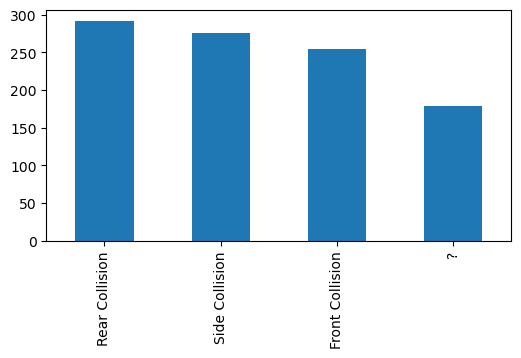

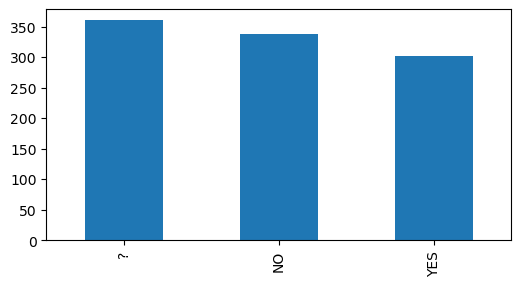

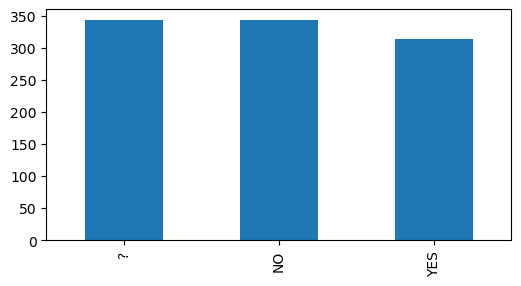

In [14]:
for column in new_df.columns:
    plt.figure(figsize=(6, 3))
    df[column].value_counts().plot.bar()

In [15]:
new_df.columns

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

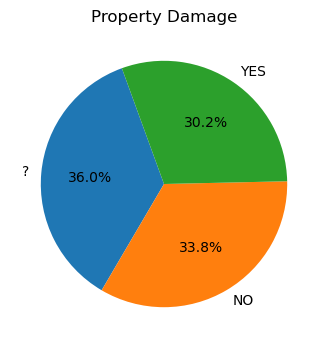

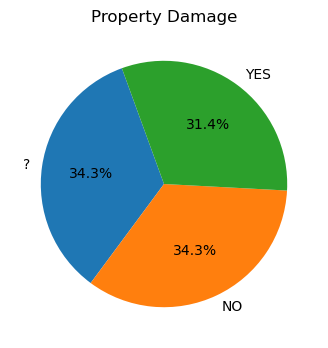

In [16]:
for column in new_df[['property_damage', 'police_report_available']].columns:
    
    class_counts = new_df[column].value_counts()
    
    labels = class_counts.index
    counts = class_counts.values
    
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=labels, explode=[0, 0, 0], autopct='%1.1f%%', startangle=110)
    plt.title("Property Damage")

    plt.show()

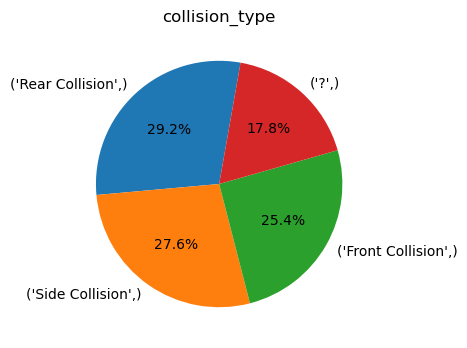

In [17]:
class_counts = new_df[['collision_type']].value_counts()

labels = class_counts.index
counts = class_counts.values


plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, explode=[0, 0, 0, 0], autopct='%1.1f%%', startangle=80)
plt.title("collision_type")

plt.show()

##### The percentage(%) of '?' in columns 'collision_type', 'property_damage' and 'police_report_available' is very high [more than 25% of whole value]. Therefore, may be they are another unnamed category in their respective column. So, it will be better to treat them like an another category in their respective column. NO IMPUTATION REQUIRED

# 

# 

# 

## Using Cat Boost Classifier

### Encoding Target values

In [18]:
df['fraud_reported']=df['fraud_reported'].replace('Y', 1)
df['fraud_reported']=df['fraud_reported'].replace('N', 0)

### Separating Features & Target columns

In [19]:
x = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

### Getting Columns with 'Object' dtype

In [22]:
categorical_x = x.select_dtypes(include=['object', 'category']).copy()
categorical_x.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

### Creating CatBoostClassifier model

In [23]:
from catboost import CatBoostClassifier

In [24]:
features = list(x_train.columns)

In [25]:
cat_features = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type','collision_type', 'incident_severity', 'authorities_contacted','property_damage', 'police_report_available']
cat_features

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

### Training the CatBoostClassifier model

In [26]:
model_cb = CatBoostClassifier(task_type='CPU', iterations=100, 
                              random_state = 2021, 
                              eval_metric="F1")

In [27]:
model_cb.fit(x_train, y_train, cat_features= cat_features, plot=True, 
             eval_set=(x_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057978
0:	learn: 0.6419753	test: 0.5251397	best: 0.5251397 (0)	total: 144ms	remaining: 14.2s
1:	learn: 0.6904762	test: 0.5396825	best: 0.5396825 (1)	total: 173ms	remaining: 8.47s
2:	learn: 0.6987952	test: 0.6275510	best: 0.6275510 (2)	total: 205ms	remaining: 6.61s
3:	learn: 0.6987952	test: 0.6291560	best: 0.6291560 (3)	total: 214ms	remaining: 5.14s
4:	learn: 0.6913580	test: 0.6109661	best: 0.6291560 (3)	total: 242ms	remaining: 4.59s
5:	learn: 0.6987952	test: 0.6134021	best: 0.6291560 (3)	total: 261ms	remaining: 4.09s
6:	learn: 0.7560976	test: 0.6288660	best: 0.6291560 (3)	total: 287ms	remaining: 3.81s
7:	learn: 0.7294118	test: 0.5828877	best: 0.6291560 (3)	total: 304ms	remaining: 3.5s
8:	learn: 0.7380952	test: 0.6086957	best: 0.6291560 (3)	total: 329ms	remaining: 3.33s
9:	learn: 0.7560976	test: 0.5931759	best: 0.6291560 (3)	total: 351ms	remaining: 3.16s
10:	learn: 0.7407407	test: 0.6010363	best: 0.6291560 (3)	total: 366ms	remaining: 2.96s
11:	learn: 0.7594937	tes

96:	learn: 0.9894737	test: 0.5260274	best: 0.6291560 (3)	total: 2.14s	remaining: 66.1ms
97:	learn: 0.9894737	test: 0.5260274	best: 0.6291560 (3)	total: 2.16s	remaining: 44ms
98:	learn: 0.9894737	test: 0.5245902	best: 0.6291560 (3)	total: 2.18s	remaining: 22ms
99:	learn: 0.9894737	test: 0.5179063	best: 0.6291560 (3)	total: 2.19s	remaining: 0us

bestTest = 0.6291560102
bestIteration = 3

Shrink model to first 4 iterations.


### Checking Scores of Feature Columns

In [28]:
pd.DataFrame(
    zip(x_train.columns, abs (model_cb.feature_importances_)),
    columns=["feature", "importance"],
).sort_values("importance").reset_index(drop=True)

feature  importance
0            months_as_customer    0.000000
1                  injury_claim    0.000000
2            total_claim_amount    0.000000
3       police_report_available    0.000000
4                     witnesses    0.000000
5               bodily_injuries    0.000000
6               property_damage    0.000000
7   number_of_vehicles_involved    0.000000
8      incident_hour_of_the_day    0.000000
9         authorities_contacted    0.000000
10               collision_type    0.000000
11               property_claim    0.000000
12                 capital-loss    0.000000
13         insured_relationship    0.000000
14           insured_occupation    0.000000
15      insured_education_level    0.000000
16                   policy_csl    0.000000
17                 policy_state    0.000000
18                capital-gains    0.000000
19                vehicle_claim    0.873281
20            policy_deductable    0.935490
21                          age    0.947634
22        policy_annual_premium    3.798169
23                  insured_sex    4.697727
24                  insured_zip    7.730652
25                incident_type    8.463297
26               umbrella_limit   16.213059
27            incident_severity   56.340692

### Checking Training Score

In [29]:
model_cb.score(x_train, y_train)

0.85

### Checking Testing Data

In [30]:
x_test.head(3)

months_as_customer  age policy_state policy_csl  policy_deductable  \
521                   5   26           IL    250/500               2000   
737                 160   33           IL   500/1000               1000   
740                 385   51           IN    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
521                1137.02               0       468872      FEMALE   
737                1422.78               0       616583      FEMALE   
740                 976.37               0       602842      FEMALE   

    insured_education_level insured_occupation insured_relationship  \
521                     PhD    farming-fishing        not-in-family   
737             High School    exec-managerial              husband   
740                      MD       craft-repair              husband   

     capital-gains  capital-loss             incident_type   collision_type  \
521          31500             0  Single Vehicle Collision   Rear Collision   
737          61600             0   Multi-vehicle Collision  Front Collision   
740              0        -61000   Multi-vehicle Collision   Rear Collision   

    incident_severity authorities_contacted  incident_hour_of_the_day  \
521        Total Loss             Ambulance                        22   
737        Total Loss             Ambulance                        17   
740      Minor Damage                 Other                        14   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
521                            1             YES                1          3   
737                            3               ?                2          3   
740                            3               ?                1          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
521                       ?               88110         16020           16020   
737                     YES               52800          5280            5280   
740                       ?               67600         13520            6760   

     vehicle_claim  
521          56070  
737          42240  
740          47320

In [31]:
x_test.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [32]:
x_test.shape

(800, 28)

### Prediction of Testing data

In [33]:
y_pred = model_cb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

### Checking Accuracy Scores of Testing data

In [34]:
from sklearn. metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.81875

### Checking f1 Score

In [36]:
from sklearn. metrics import f1_score

### Importing Metrics

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score, classification_report

### ROC Curve

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [39]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.61809045 1.        ]
False Positive rate =  [0.         0.11480865 1.        ]


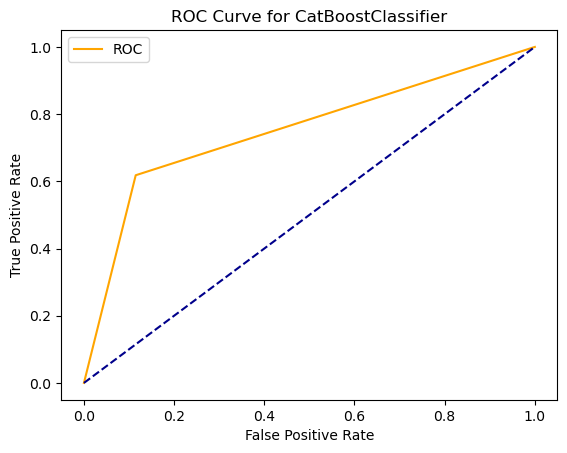

In [40]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoostClassifier')
plt.legend()
plt.show()

### roc_auc_score

In [41]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7516409000075253

### Confusion Matrix

In [42]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[532,  69],
       [ 76, 123]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

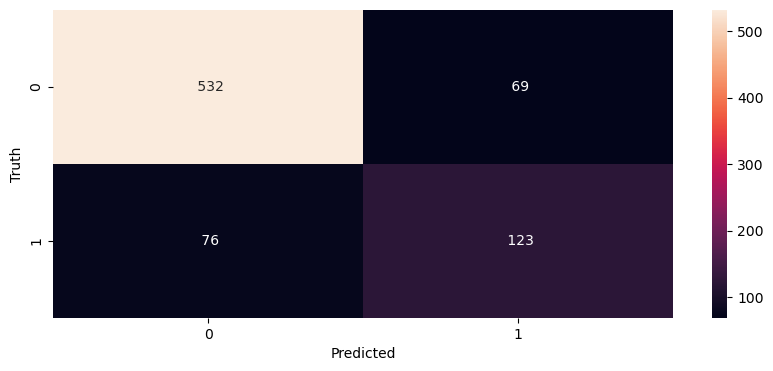

In [43]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<Figure size 600x600 with 0 Axes>

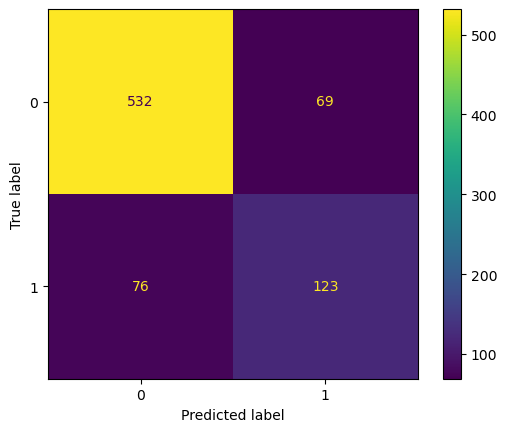

In [44]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (6,6))
plot_confusion_matrix(model_cb, x_test, y_test)
plt.show()

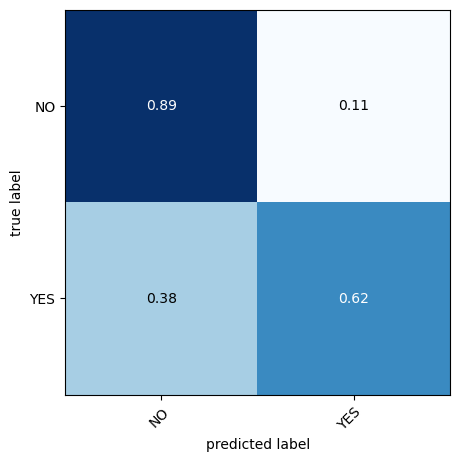

In [45]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       601
           1       0.64      0.62      0.63       199

    accuracy                           0.82       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.82      0.82      0.82       800



### ROC Curve

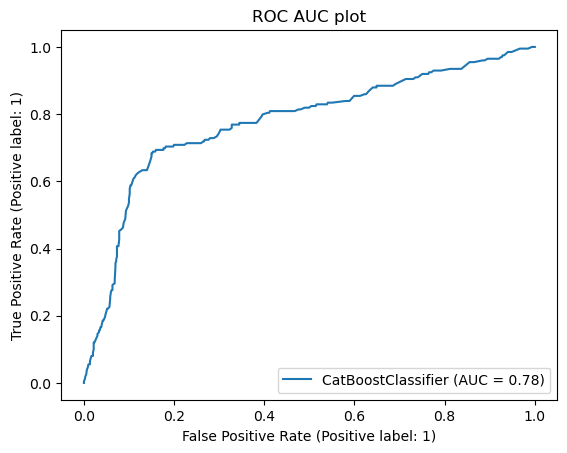

In [47]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_cb, x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# 

# 

# 

### Lets try others models

## Printing Dataframe

In [48]:
dt=df.copy()
dt.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation insured_relationship  \
0                      MD       craft-repair              husband   
1                      MD  machine-op-inspct       other-relative   
2                     PhD              sales            own-child   
3                     PhD       armed-forces            unmarried   
4               Associate              sales            unmarried   

   capital-gains  capital-loss             incident_type   collision_type  \
0          53300             0  Single Vehicle Collision   Side Collision   
1              0             0             Vehicle Theft                ?   
2          35100             0   Multi-vehicle Collision   Rear Collision   
3          48900        -62400  Single Vehicle Collision  Front Collision   
4          66000        -46000             Vehicle Theft                ?   

  incident_severity authorities_contacted  incident_hour_of_the_day  \
0      Major Damage                Police                         5   
1      Minor Damage                Police                         8   
2      Minor Damage                Police                         7   
3      Major Damage                Police                         5   
4      Minor Damage                  None                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1               ?                0          0   
2                            3              NO                2          3   
3                            1               ?                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                       ?                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  fraud_reported  
0          52080               1  
1           3510               1  
2          23100               0  
3          50720               1  
4           4550               0

In [49]:
dt.shape

(1000, 29)

# 

# 

## Encoding

### Checking Value counts of Categorical Columns

In [50]:
encode_columns = dt.select_dtypes(include=['object']).copy()

In [51]:
for column in encode_columns.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: policy_state
Unique Values: OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


Column: policy_csl
Unique Values: 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


Column: insured_sex
Unique Values: FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


Column: insured_education_level
Unique Values: JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


Column: insured_occupation
Unique Values: machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


Column: insured_relationship
Unique Values

### Encoding Categorical Values

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
for column in encode_columns:
    dt[column] = le.fit_transform(dt[column])

### Checking Value counts of Categorical Columns

In [54]:
for column in encode_columns.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: policy_state
Unique Values: 2    352
0    338
1    310
Name: policy_state, dtype: int64


Column: policy_csl
Unique Values: 1    351
0    349
2    300
Name: policy_csl, dtype: int64


Column: insured_sex
Unique Values: 0    537
1    463
Name: insured_sex, dtype: int64


Column: insured_education_level
Unique Values: 3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64


Column: insured_occupation
Unique Values: 6     93
9     85
12    78
11    76
3     76
2     74
13    72
7     71
8     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64


Column: insured_relationship
Unique Values: 3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64


Column: incident_type
Unique Values: 0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64


Column: collision_type
Unique Values: 2    292
3    276
1    254
0    178
Name: collision_type, dtype: int

In [55]:
dt.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  insured_occupation  insured_relationship  \
0                        4                   2                     0   
1                        4                   6                     2   
2                        6                  11                     3   
3                        6                   1                     4   
4                        0                  11                     4   

   capital-gains  capital-loss  incident_type  collision_type  \
0          53300             0              2               3   
1              0             0              3               0   
2          35100             0              0               2   
3          48900        -62400              2               1   
4          66000        -46000              3               0   

   incident_severity  authorities_contacted  incident_hour_of_the_day  \
0                  0                      4                         5   
1                  1                      4                         8   
2                  1                      4                         7   
3                  0                      4                         5   
4                  1                      2                        20   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                2                1          2   
1                            1                0                0          0   
2                            3                1                2          3   
3                            1                0                1          2   
4                            1                1                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        2               71610          6510           13020   
1                        0                5070           780             780   
2                        1               34650          7700            3850   
3                        1               63400          6340            6340   
4                        1                6500          1300             650   

   vehicle_claim  fraud_reported  
0          52080               1  
1           3510               1  
2          23100               0  
3          50720               1  
4           4550               0

# 

# 

## Feature Selection

In [56]:
x = dt.drop(columns = ['fraud_reported'])
y = dt['fraud_reported']

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [59]:
print(model.feature_importances_)

[0.03230931 0.03274301 0.02524989 0.02837177 0.02826793 0.03441297
 0.02412188 0.0350475  0.01970293 0.03126006 0.0360115  0.03026578
 0.02938679 0.03049021 0.01761143 0.02898054 0.19054887 0.02884959
 0.0363056  0.01743953 0.02696218 0.0296478  0.03039834 0.02874714
 0.03670652 0.03348173 0.03842035 0.03825886]


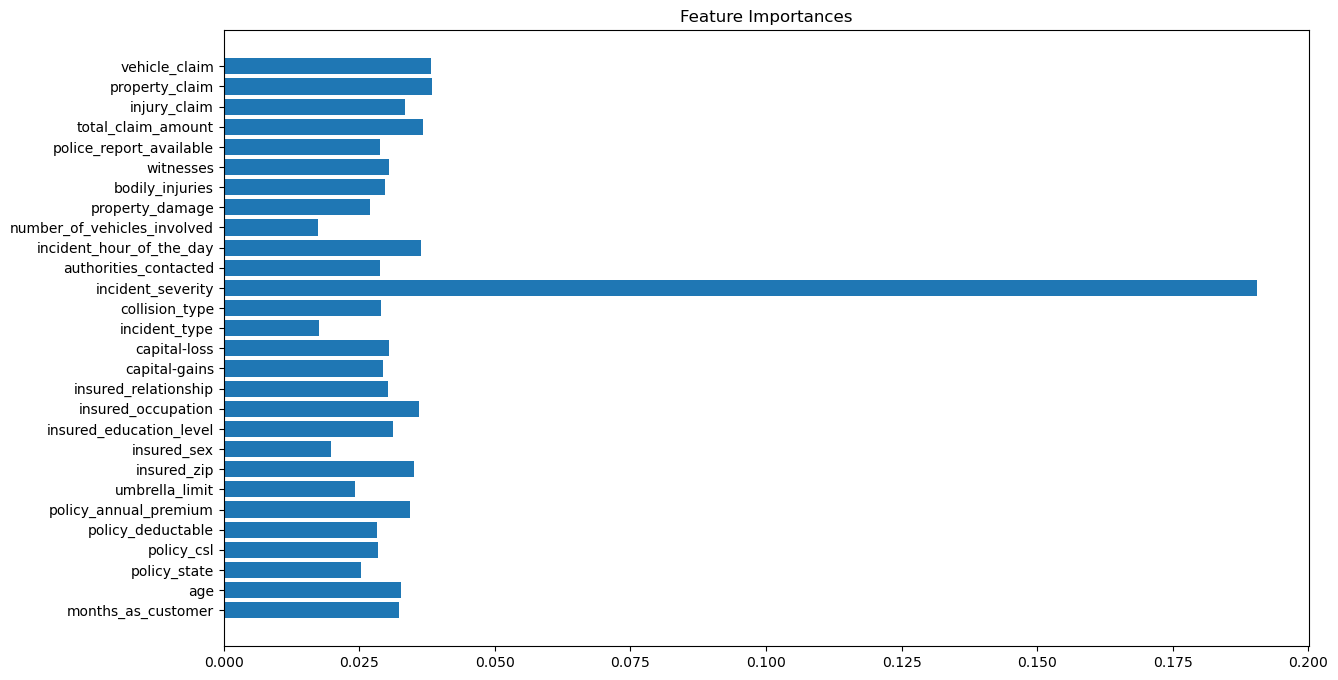

In [60]:
plt.figure(figsize=(14,8))
plt.barh(x.columns, model.feature_importances_) 
plt.title("Feature Importances")
plt.show()

In [61]:
dt.shape

(1000, 29)

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

In [63]:
best_features = SelectKBest(score_func=f_classif, k=28)

fit = best_features.fit(x,y)

dt_scores = pd.DataFrame(fit.scores_) 
dt_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([dt_columns, dt_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(28, 'Score'))

                   Feature_Name       Score
16            incident_severity  196.960603
27                vehicle_claim   29.718214
24           total_claim_amount   27.463776
26               property_claim   19.327729
15               collision_type   12.252860
25                 injury_claim    8.328776
6                umbrella_limit    3.441452
19  number_of_vehicles_involved    2.689100
14                incident_type    2.539153
22                    witnesses    2.451026
17        authorities_contacted    2.098018
3                    policy_csl    1.382236
21              bodily_injuries    1.146656
8                   insured_sex    0.952144
20              property_damage    0.929077
2                  policy_state    0.865237
23      police_report_available    0.791953
11         insured_relationship    0.442135
0            months_as_customer    0.421370
7                   insured_zip    0.374497
12                capital-gains    0.366990
13                 capital-loss 

# 

# 

## Removing Multi-colinearity

In [65]:
corr = dt.corr()
corr

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_zip                            0.017895  0.025604      0.008777   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.017824 -0.018672      0.034739   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.007040 -0.001486      0.008623   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available                0.017647  0.014661      0.071950   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
fraud_reported                         0.020544  0.012143      0.029432   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026819           0.026807   
age                           -0.015185           0.029188   
policy_state                   0.001027           0.010033   
policy_csl                     1.000000           0.003384   
policy_deductable              0.003384           1.000000   
policy_annual_premium          0.023978          -0.003245   
umbrella_limit                 0.021636           0.010870   
insured_zip                    0.006879           0.004545   
insured_sex                   -0.010757          -0.009733   
insured_education_level        0.009153           0.015217   
insured_occupation             0.015788          -0.046733   
insured_relationship          -0.030063          -0.022945   
capital-gains                  0.005249           0.035212   
capital-loss                  -0.034612          -0.023544   
incident_type                  0.011997          -0.038411   
collision_type                -0.036687          -0.033182   
incident_severity              0.022530          -0.015711   
authorities_contacted          0.056182          -0.000760   
incident_hour_of_the_day      -0.001869           0.060935   
number_of_vehicles_involved   -0.019403           0.051214   
property_damage               -0.027340           0.016900   
bodily_injuries               -0.000595          -0.022765   
witnesses                      0.071500           0.066639   
police_report_available        0.002424           0.030166   
total_claim_amount            -0.055758           0.022839   
injury_claim                  -0.078818           0.039107   
property_claim                -0.042216           0.064792   
vehicle_claim                 -0.046791   

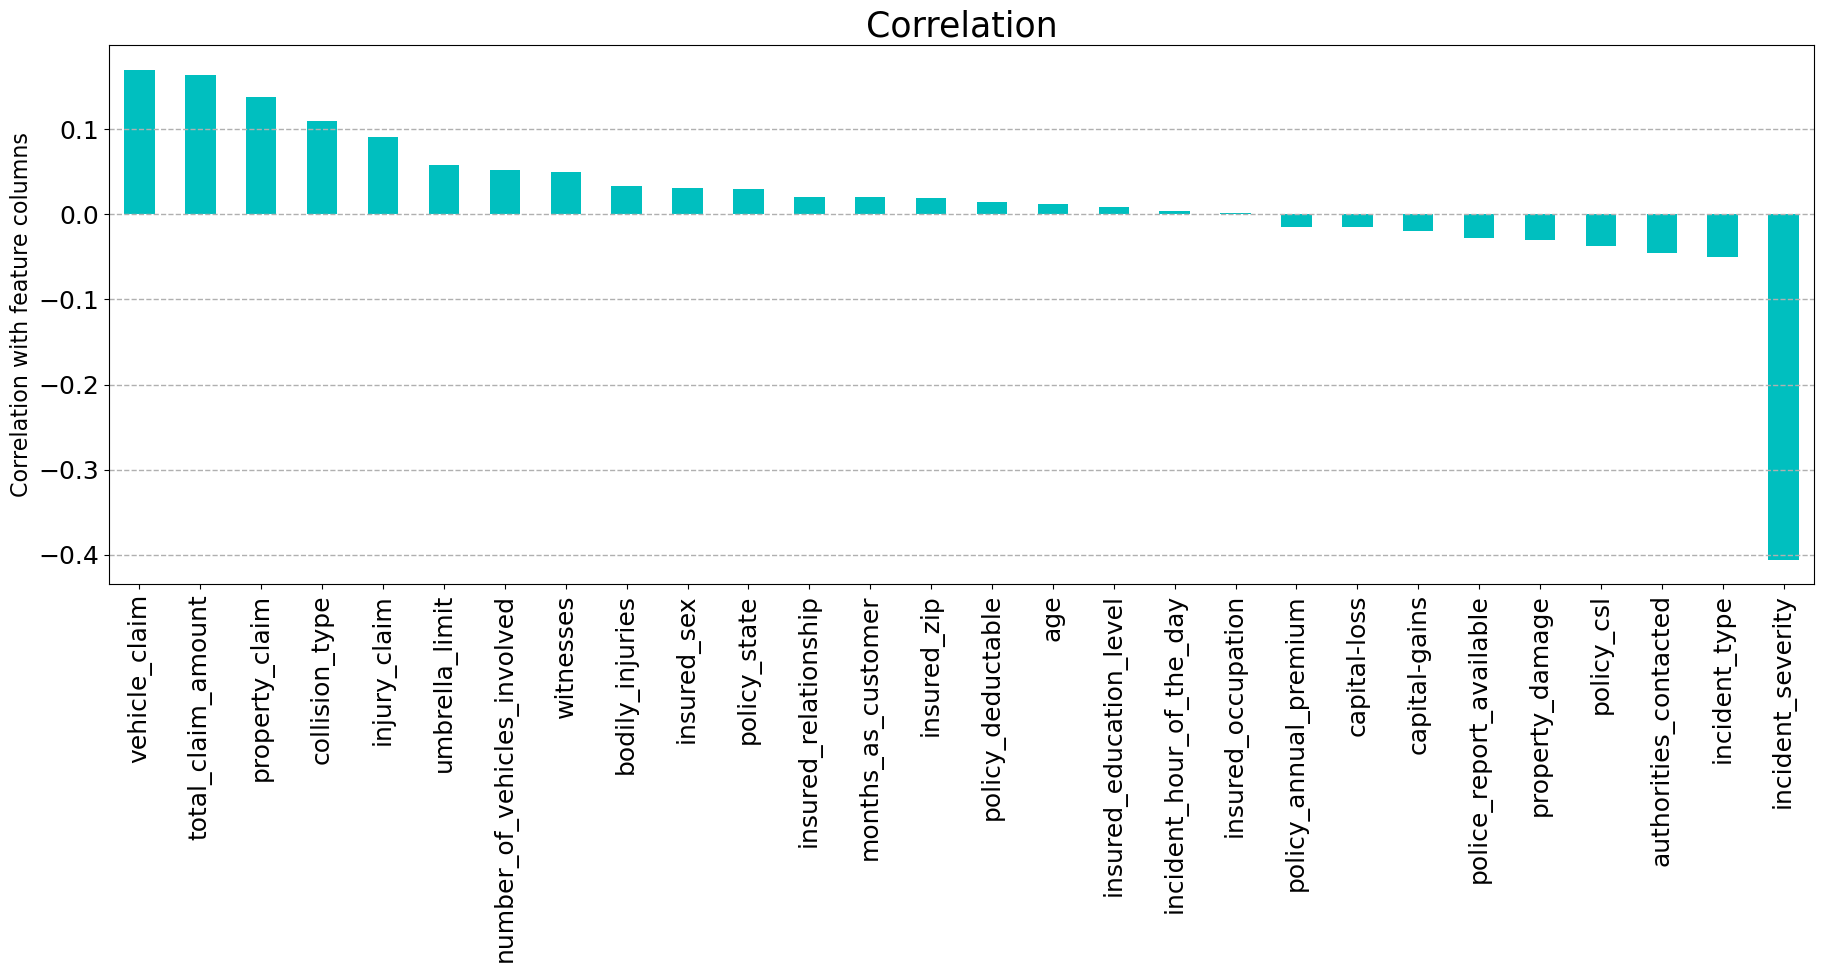

In [66]:
plt.figure(figsize=(22, 7))
dt.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar', color='c', fontsize=18)
plt.ylabel('Correlation with feature columns', fontsize=16)
plt.title('Correlation', fontsize=25)

# Correct the parameter name from 'linewidth' to 'linewidth'
plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1, which='both')

plt.show()


In [67]:
x = dt.drop(columns = ['fraud_reported'])

vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif = vif.sort_values(by="VIF Scores", ascending=False)

vif

VIF Scores                    variables
27         inf                vehicle_claim
26         inf               property_claim
25         inf                 injury_claim
24         inf           total_claim_amount
1   102.624643                          age
7    39.012634                  insured_zip
5    25.412318        policy_annual_premium
0    23.840029           months_as_customer
19   17.917055  number_of_vehicles_involved
14    9.009846                incident_type
15    5.882540               collision_type
4     4.530421            policy_deductable
18    4.163917     incident_hour_of_the_day
10    3.708194           insured_occupation
9     3.371814      insured_education_level
17    3.154046        authorities_contacted
11    3.113918         insured_relationship
16    3.006574            incident_severity
22    2.864834                    witnesses
2     2.535213                 policy_state
21    2.498492              bodily_injuries
23    2.488065      police_report_available
3     2.439211                   policy_csl
20    2.420857              property_damage
13    1.952864                 capital-loss
8     1.904959                  insured_sex
12    1.856964                capital-gains
6     1.255913               umbrella_limit

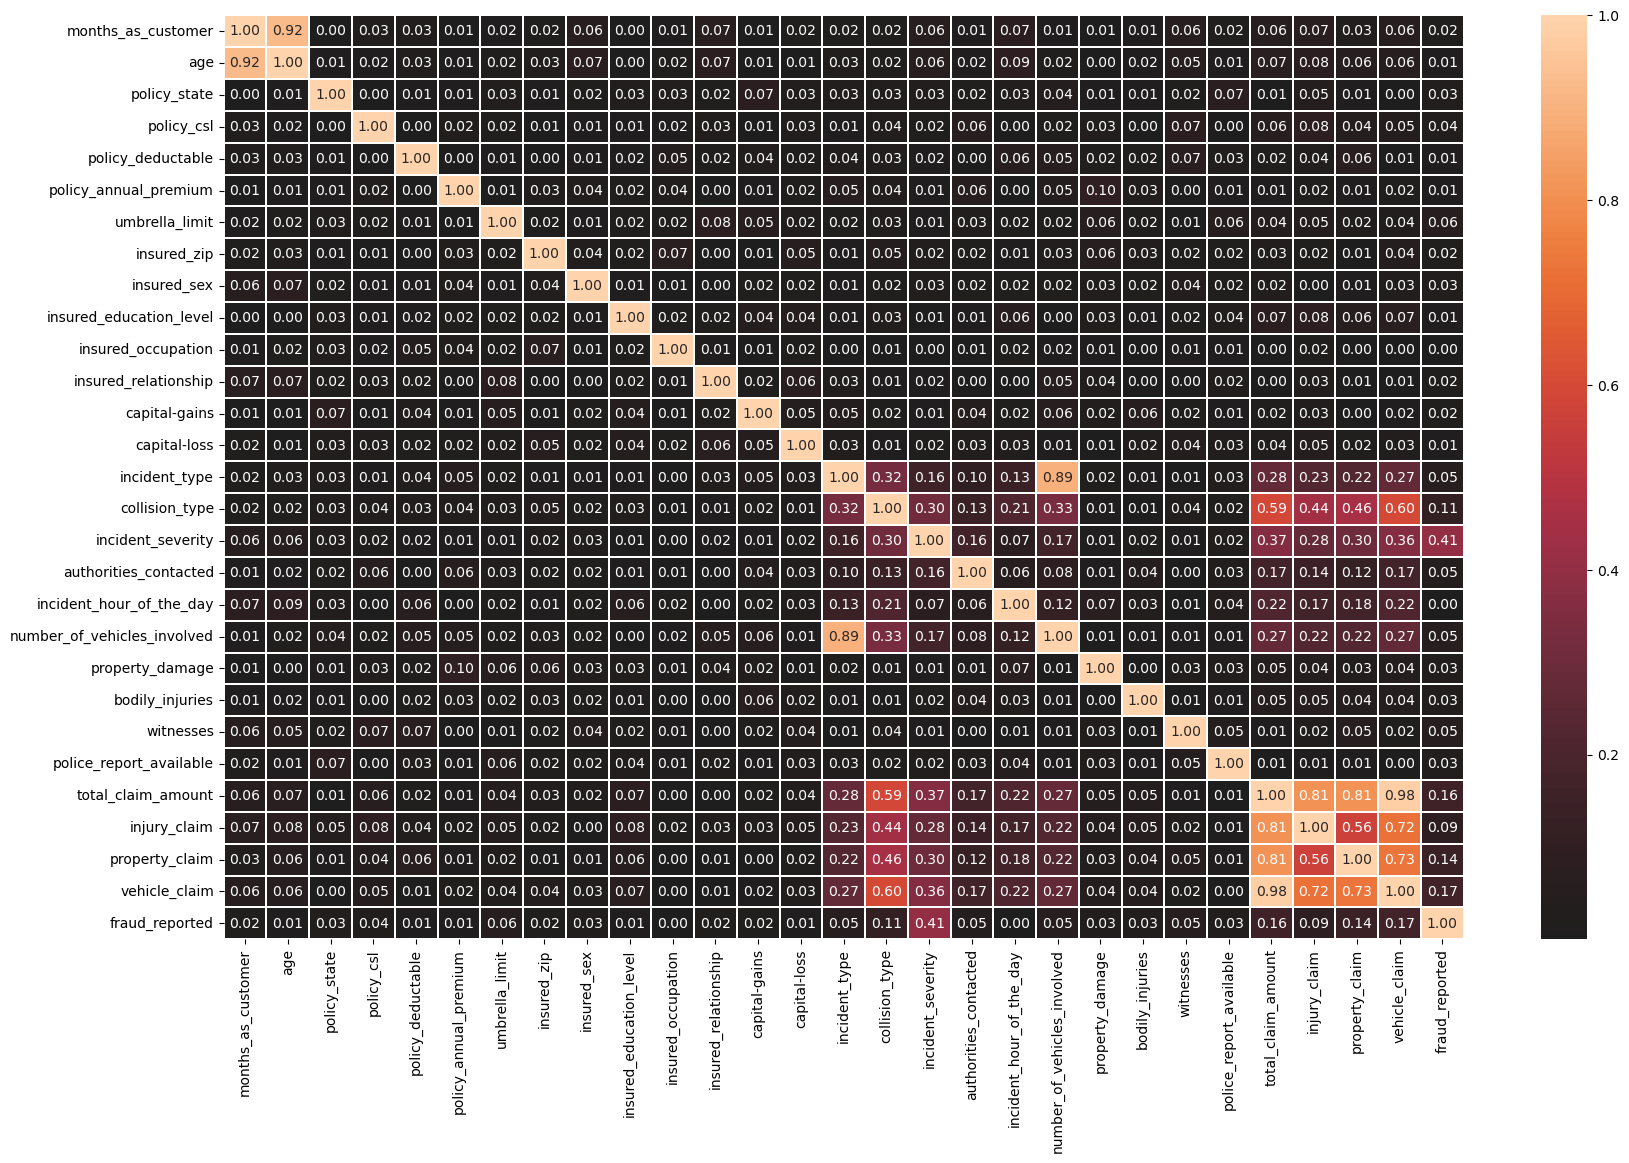

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = dt.corr().abs()

plt.figure(figsize=(20,12))
sns.heatmap(dt_corr, center=0, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

In [69]:
dt.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

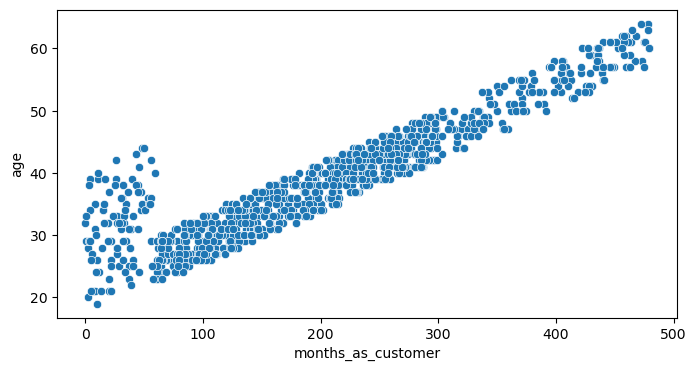

In [70]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'months_as_customer', y = 'age', data = dt)

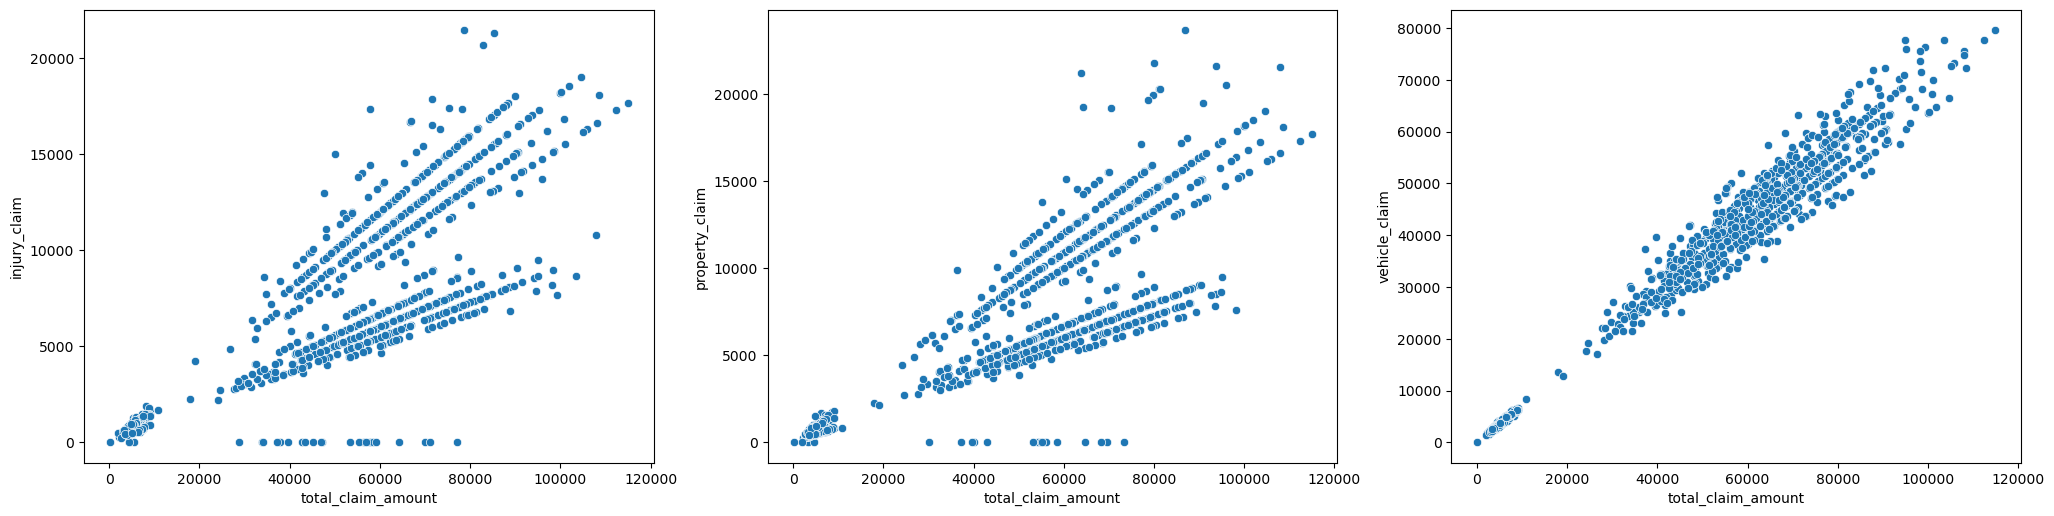

In [71]:
Y=dt[['injury_claim', 'property_claim', 'vehicle_claim']].copy()

plt.figure(figsize=(25,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'total_claim_amount', y = Y[column], data = dt)

    plotnumber+=1
plt.show()

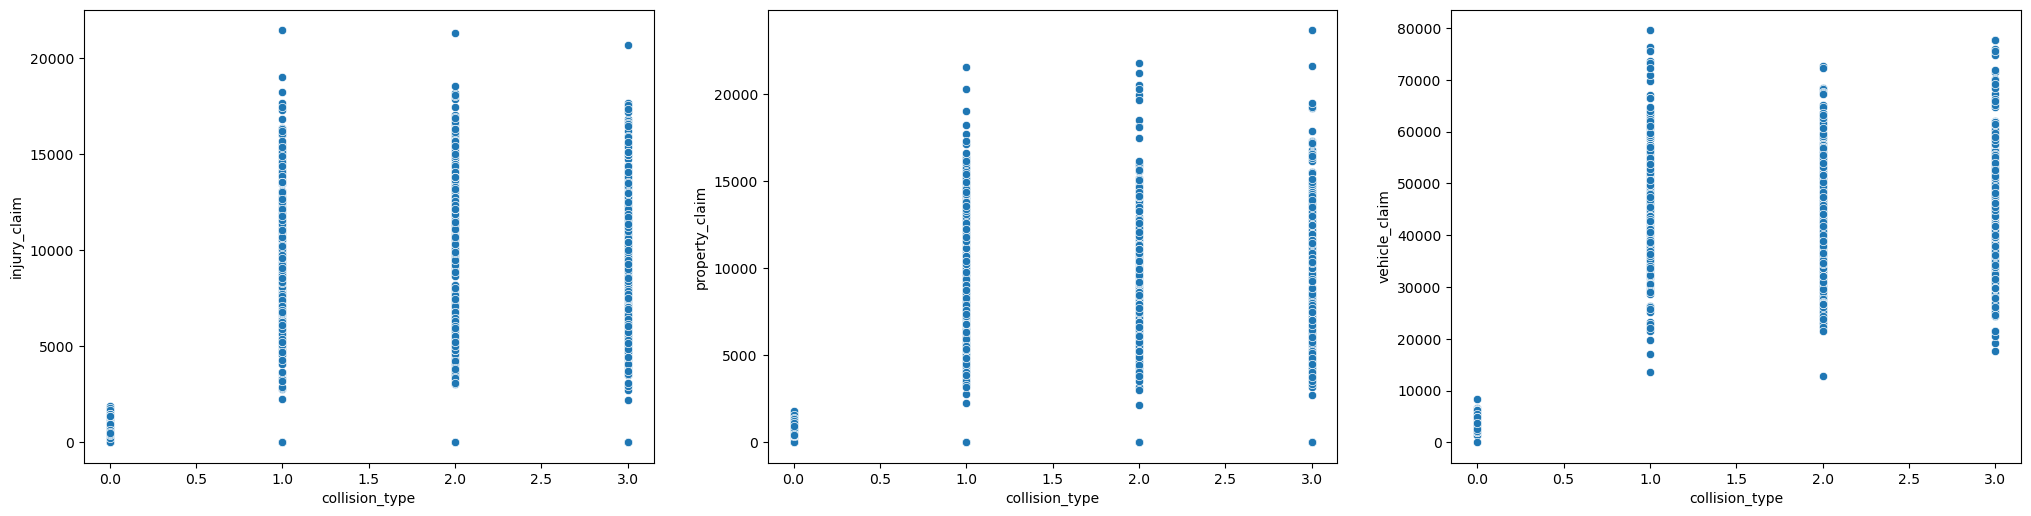

In [72]:
Y=dt[['injury_claim', 'property_claim', 'vehicle_claim']].copy()

plt.figure(figsize=(25,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'collision_type', y = Y[column], data = dt)

    plotnumber+=1
plt.show()

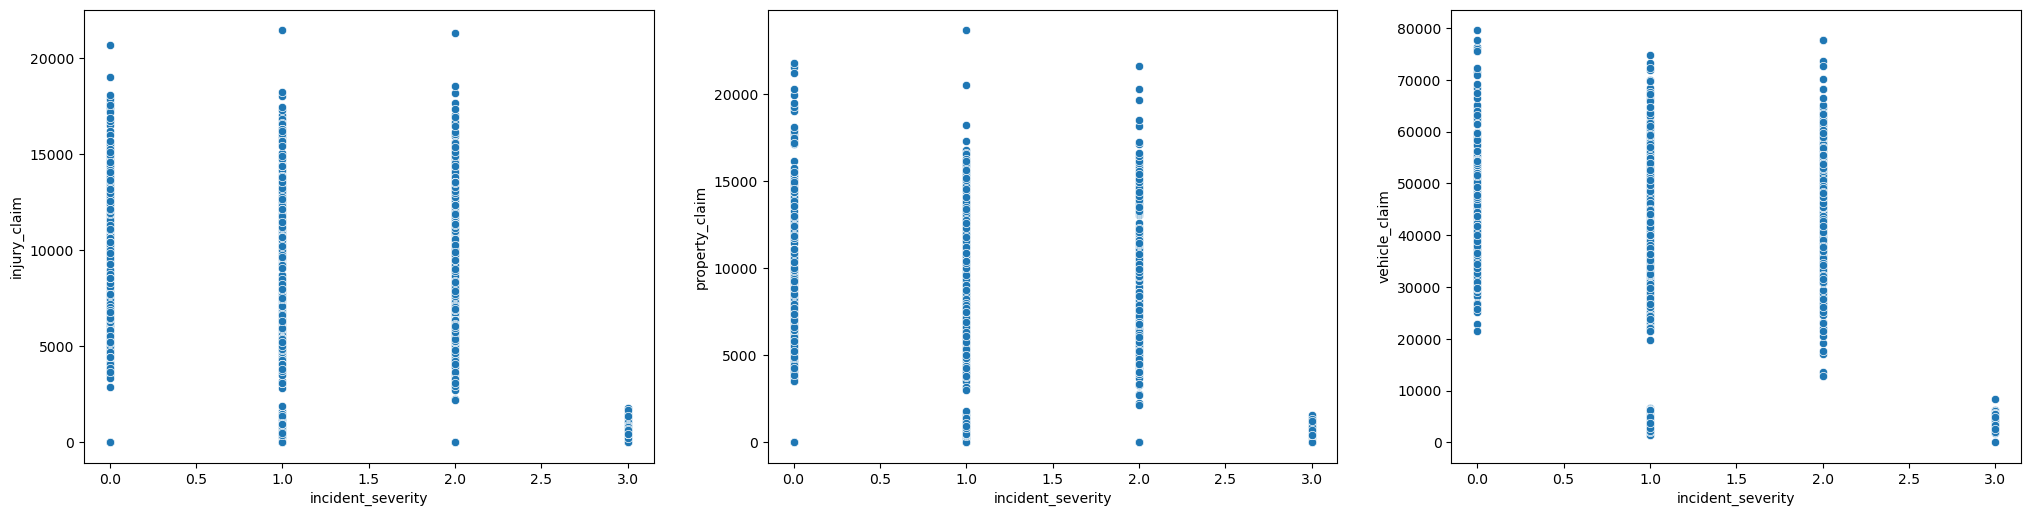

In [73]:
Y=dt[['injury_claim', 'property_claim', 'vehicle_claim']].copy()

plt.figure(figsize=(25,20))
plotnumber = 1

for column in Y:
    if plotnumber<=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x = 'incident_severity', y = Y[column], data = dt)

    plotnumber+=1
plt.show()

### Dropping feature columns

##### Dropping feature columns with high multi-colinearity and low colinearity with Target column

In [74]:
dt.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [75]:
dt=dt.drop(columns = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'age', 'incident_type'])
dt.shape

(1000, 23)

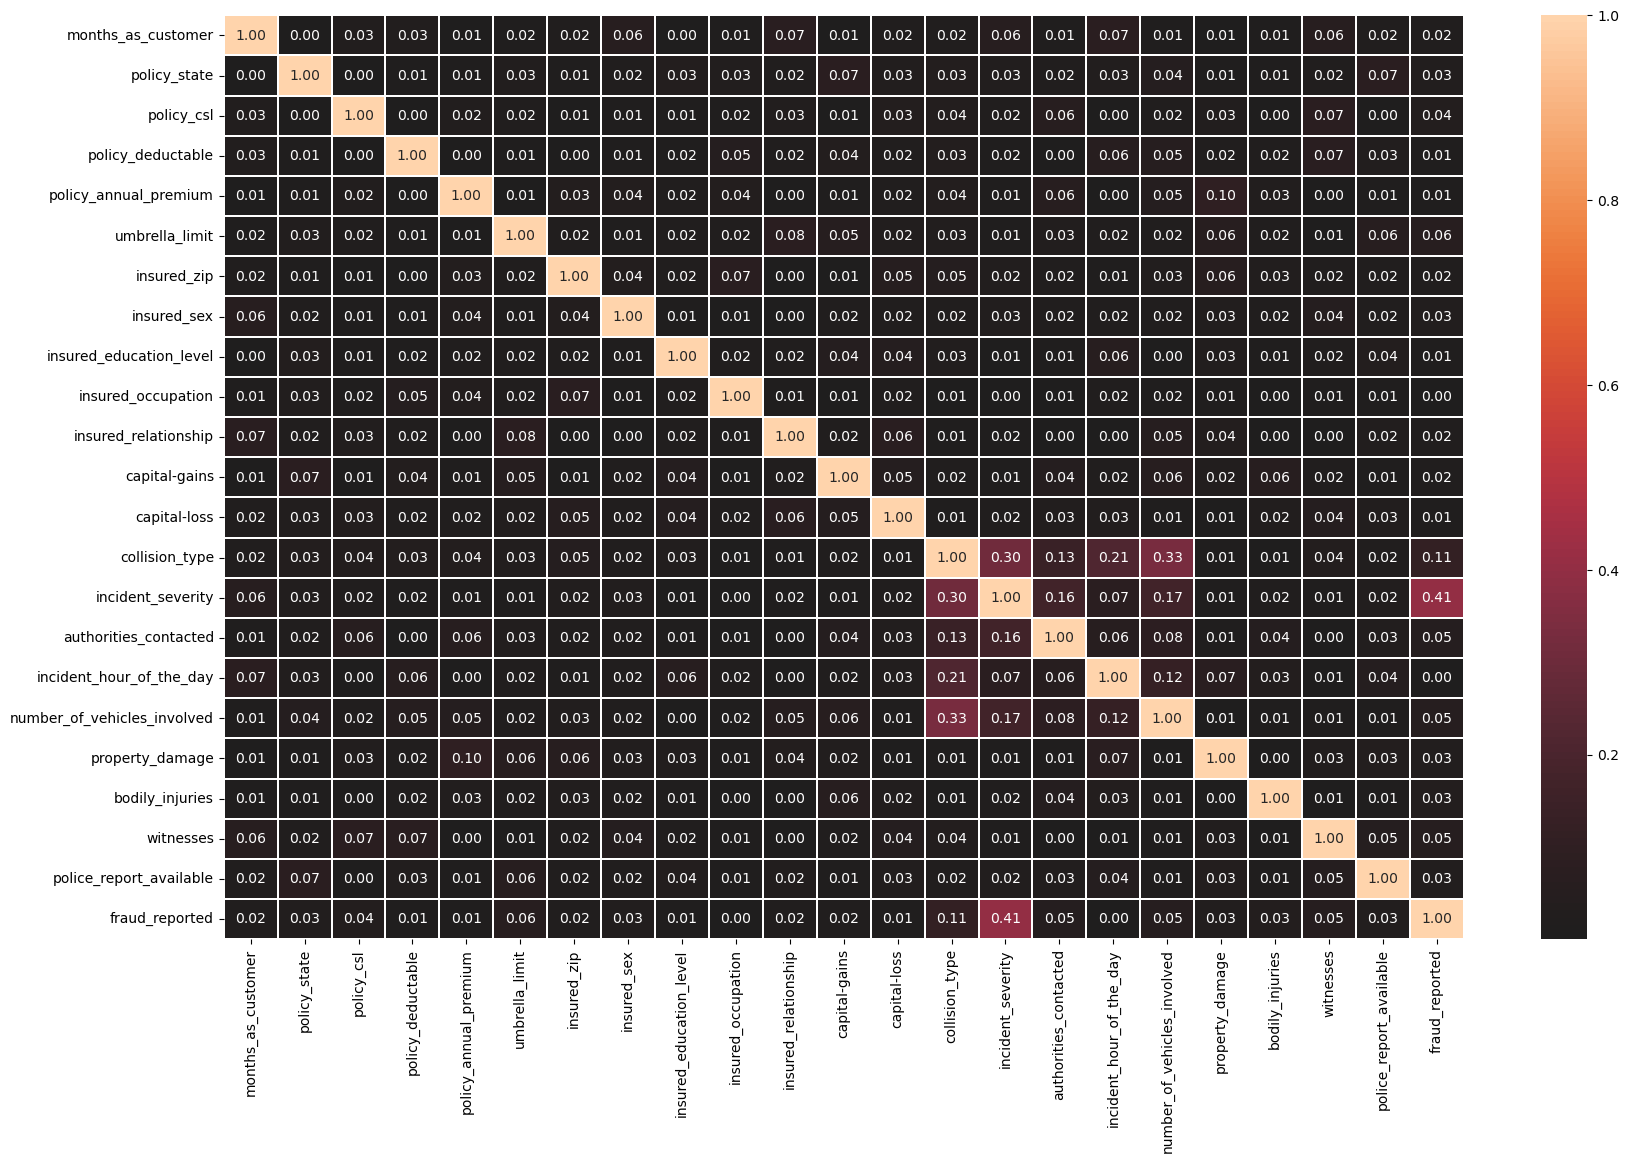

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = dt.corr().abs()

plt.figure(figsize=(20,12))
sns.heatmap(dt_corr, center=0, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

In [77]:
x = dt.drop(columns = ['fraud_reported'])

vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif = vif.sort_values(by="VIF Scores", ascending=False)

vif

VIF Scores                    variables
6    28.742712                  insured_zip
4    22.275091        policy_annual_premium
17    4.837188  number_of_vehicles_involved
3     4.427066            policy_deductable
13    4.318584               collision_type
0     4.174868           months_as_customer
16    4.065797     incident_hour_of_the_day
9     3.635484           insured_occupation
8     3.290659      insured_education_level
10    3.074386         insured_relationship
15    3.065786        authorities_contacted
20    2.833957                    witnesses
14    2.833793            incident_severity
1     2.517674                 policy_state
19    2.477081              bodily_injuries
21    2.472906      police_report_available
2     2.417919                   policy_csl
18    2.411418              property_damage
12    1.930184                 capital-loss
7     1.877591                  insured_sex
11    1.850670                capital-gains
5     1.253573               umbrella_limit

# 

# 

## Removing Skewness

### Checking skewness of Continuous data

In [78]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim             

In [79]:
con_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).copy()
con_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported'],
      dtype='object')

In [80]:
common_columns = dt.columns.intersection(con_df.columns)
ds = dt[common_columns].copy()
ds.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'fraud_reported'],
      dtype='object')

In [81]:
from scipy.stats import skew

months_as_customer: 0.36163335598724383


<Figure size 2000x1500 with 0 Axes>

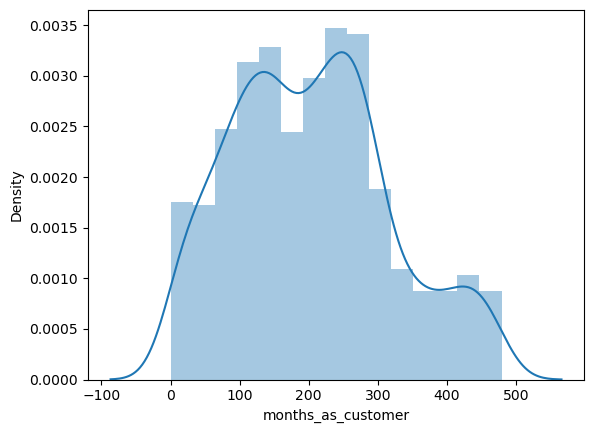

policy_deductable: 0.47717008402692257


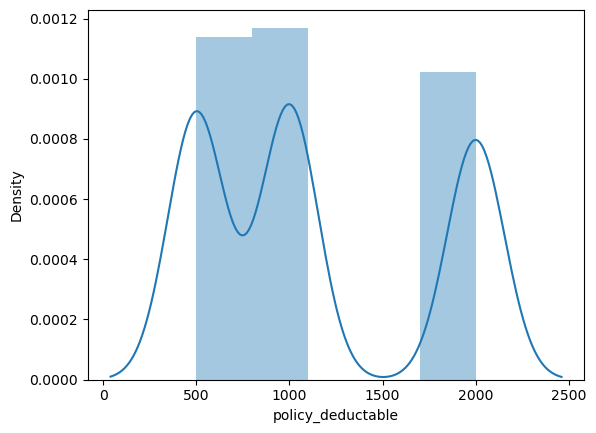

policy_annual_premium: 0.004395388781646907


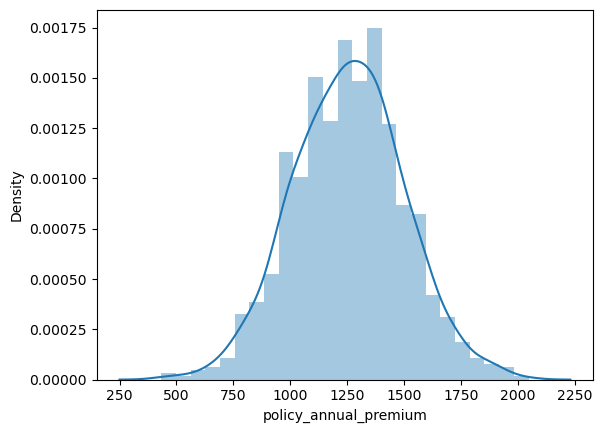

umbrella_limit: 1.804001000430236


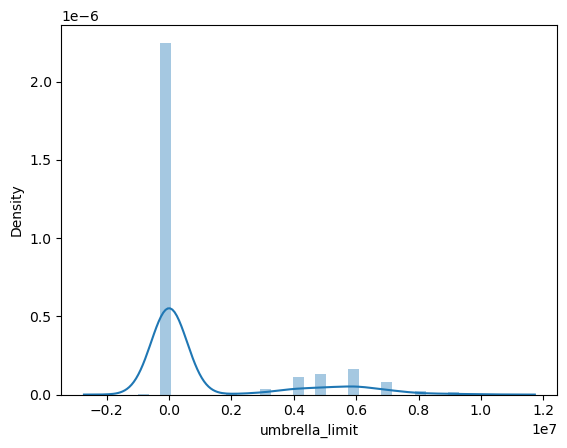

insured_zip: 0.8153285842913767


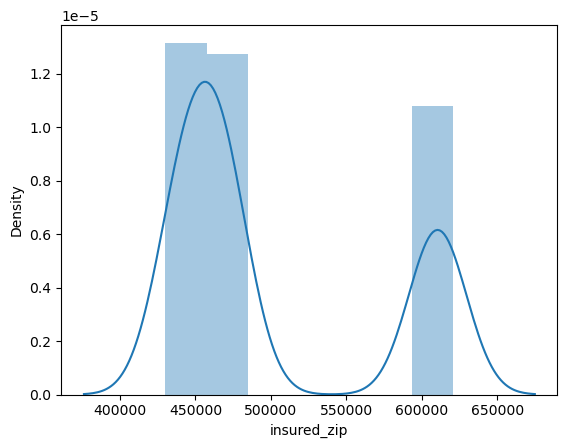

capital-gains: 0.4781316547453607


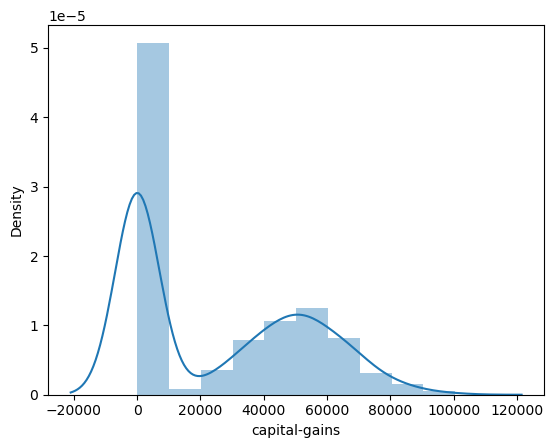

capital-loss: -0.3908844902380315


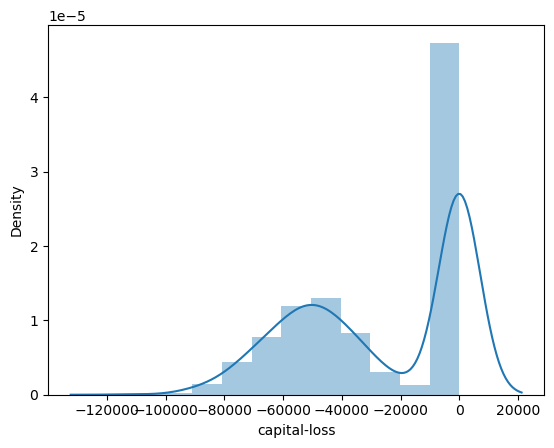

incident_hour_of_the_day: -0.03553106748270712


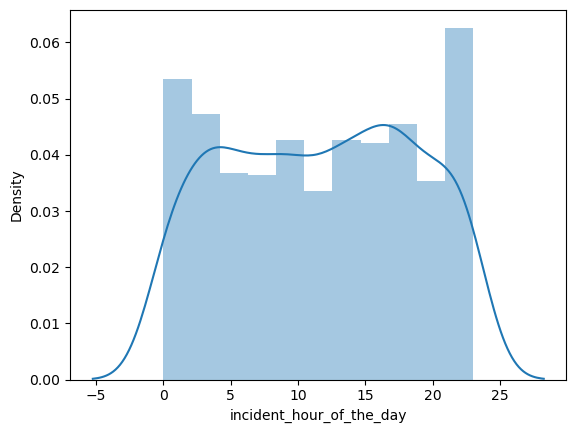

number_of_vehicles_involved: 0.5019097769712054


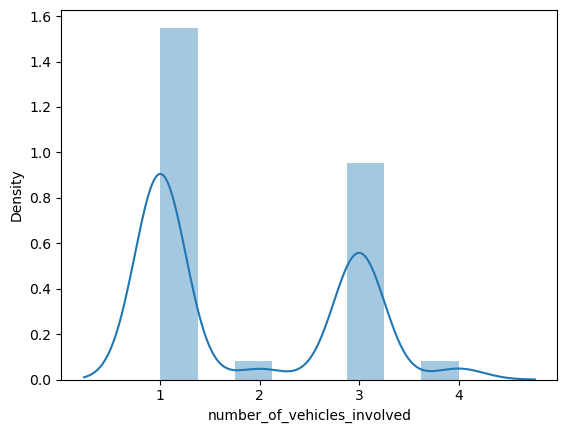

bodily_injuries: 0.014754928613816467


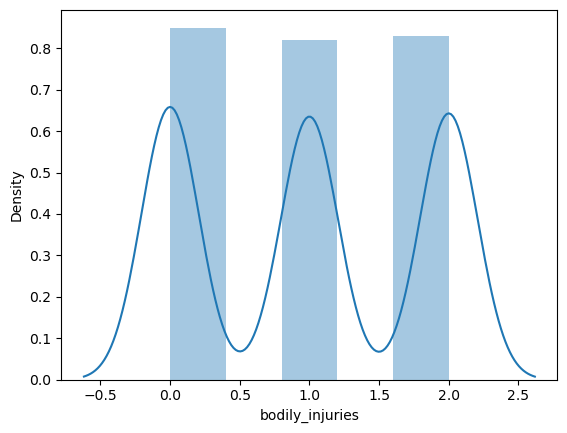

witnesses: 0.019606952945384615


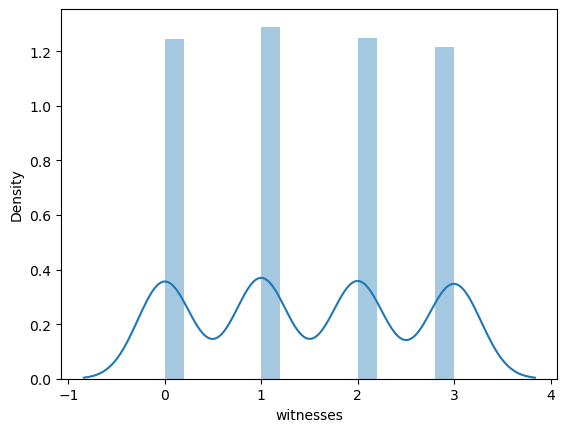

fraud_reported: 1.1732877926115954


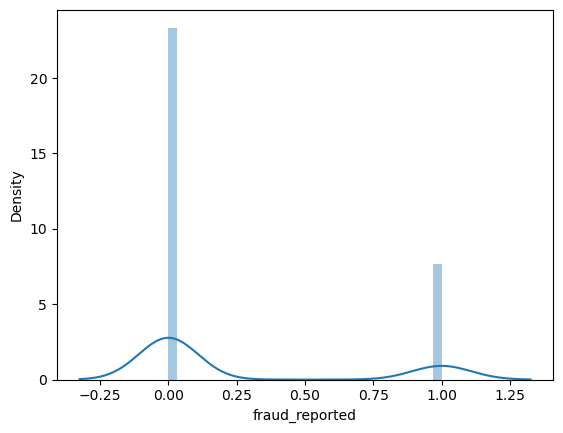

In [82]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in ds:
    print(f"\033[1m{column}: {skew(ds[column])}\033[0m")
    
    plt.figure()
    sns.distplot(ds[column])
    
    plt.show()

In [83]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

### Droppping Columns

##### Column 'umbrella_limit' is mostly filled with 0.So better remove this columms, than remove skewness.

In [84]:
UL0 = dt[dt['umbrella_limit'] == 0]
UL0.shape

(798, 23)

In [85]:
dt.shape

(1000, 23)

In [86]:
dt=dt.drop(columns = ['umbrella_limit'])
dt.shape

(1000, 22)

### Remove Skewness

In [87]:
dt['insured_zip'].skew()

0.8165539258839357

In [88]:
dt['insured_zip'] = np.cbrt(np.cbrt(dt['insured_zip']))
dt['insured_zip'].skew()

0.7865579661230876

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

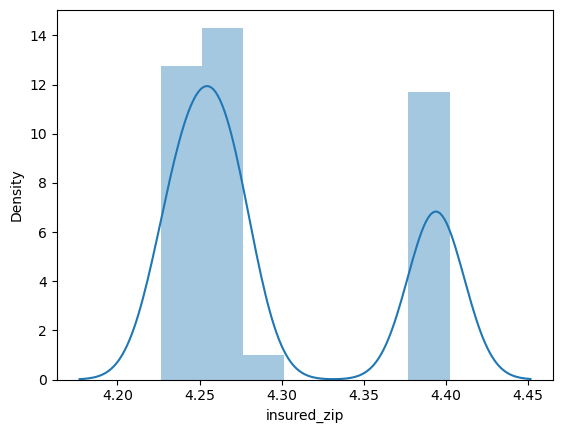

In [89]:
sns.distplot(dt['insured_zip'])

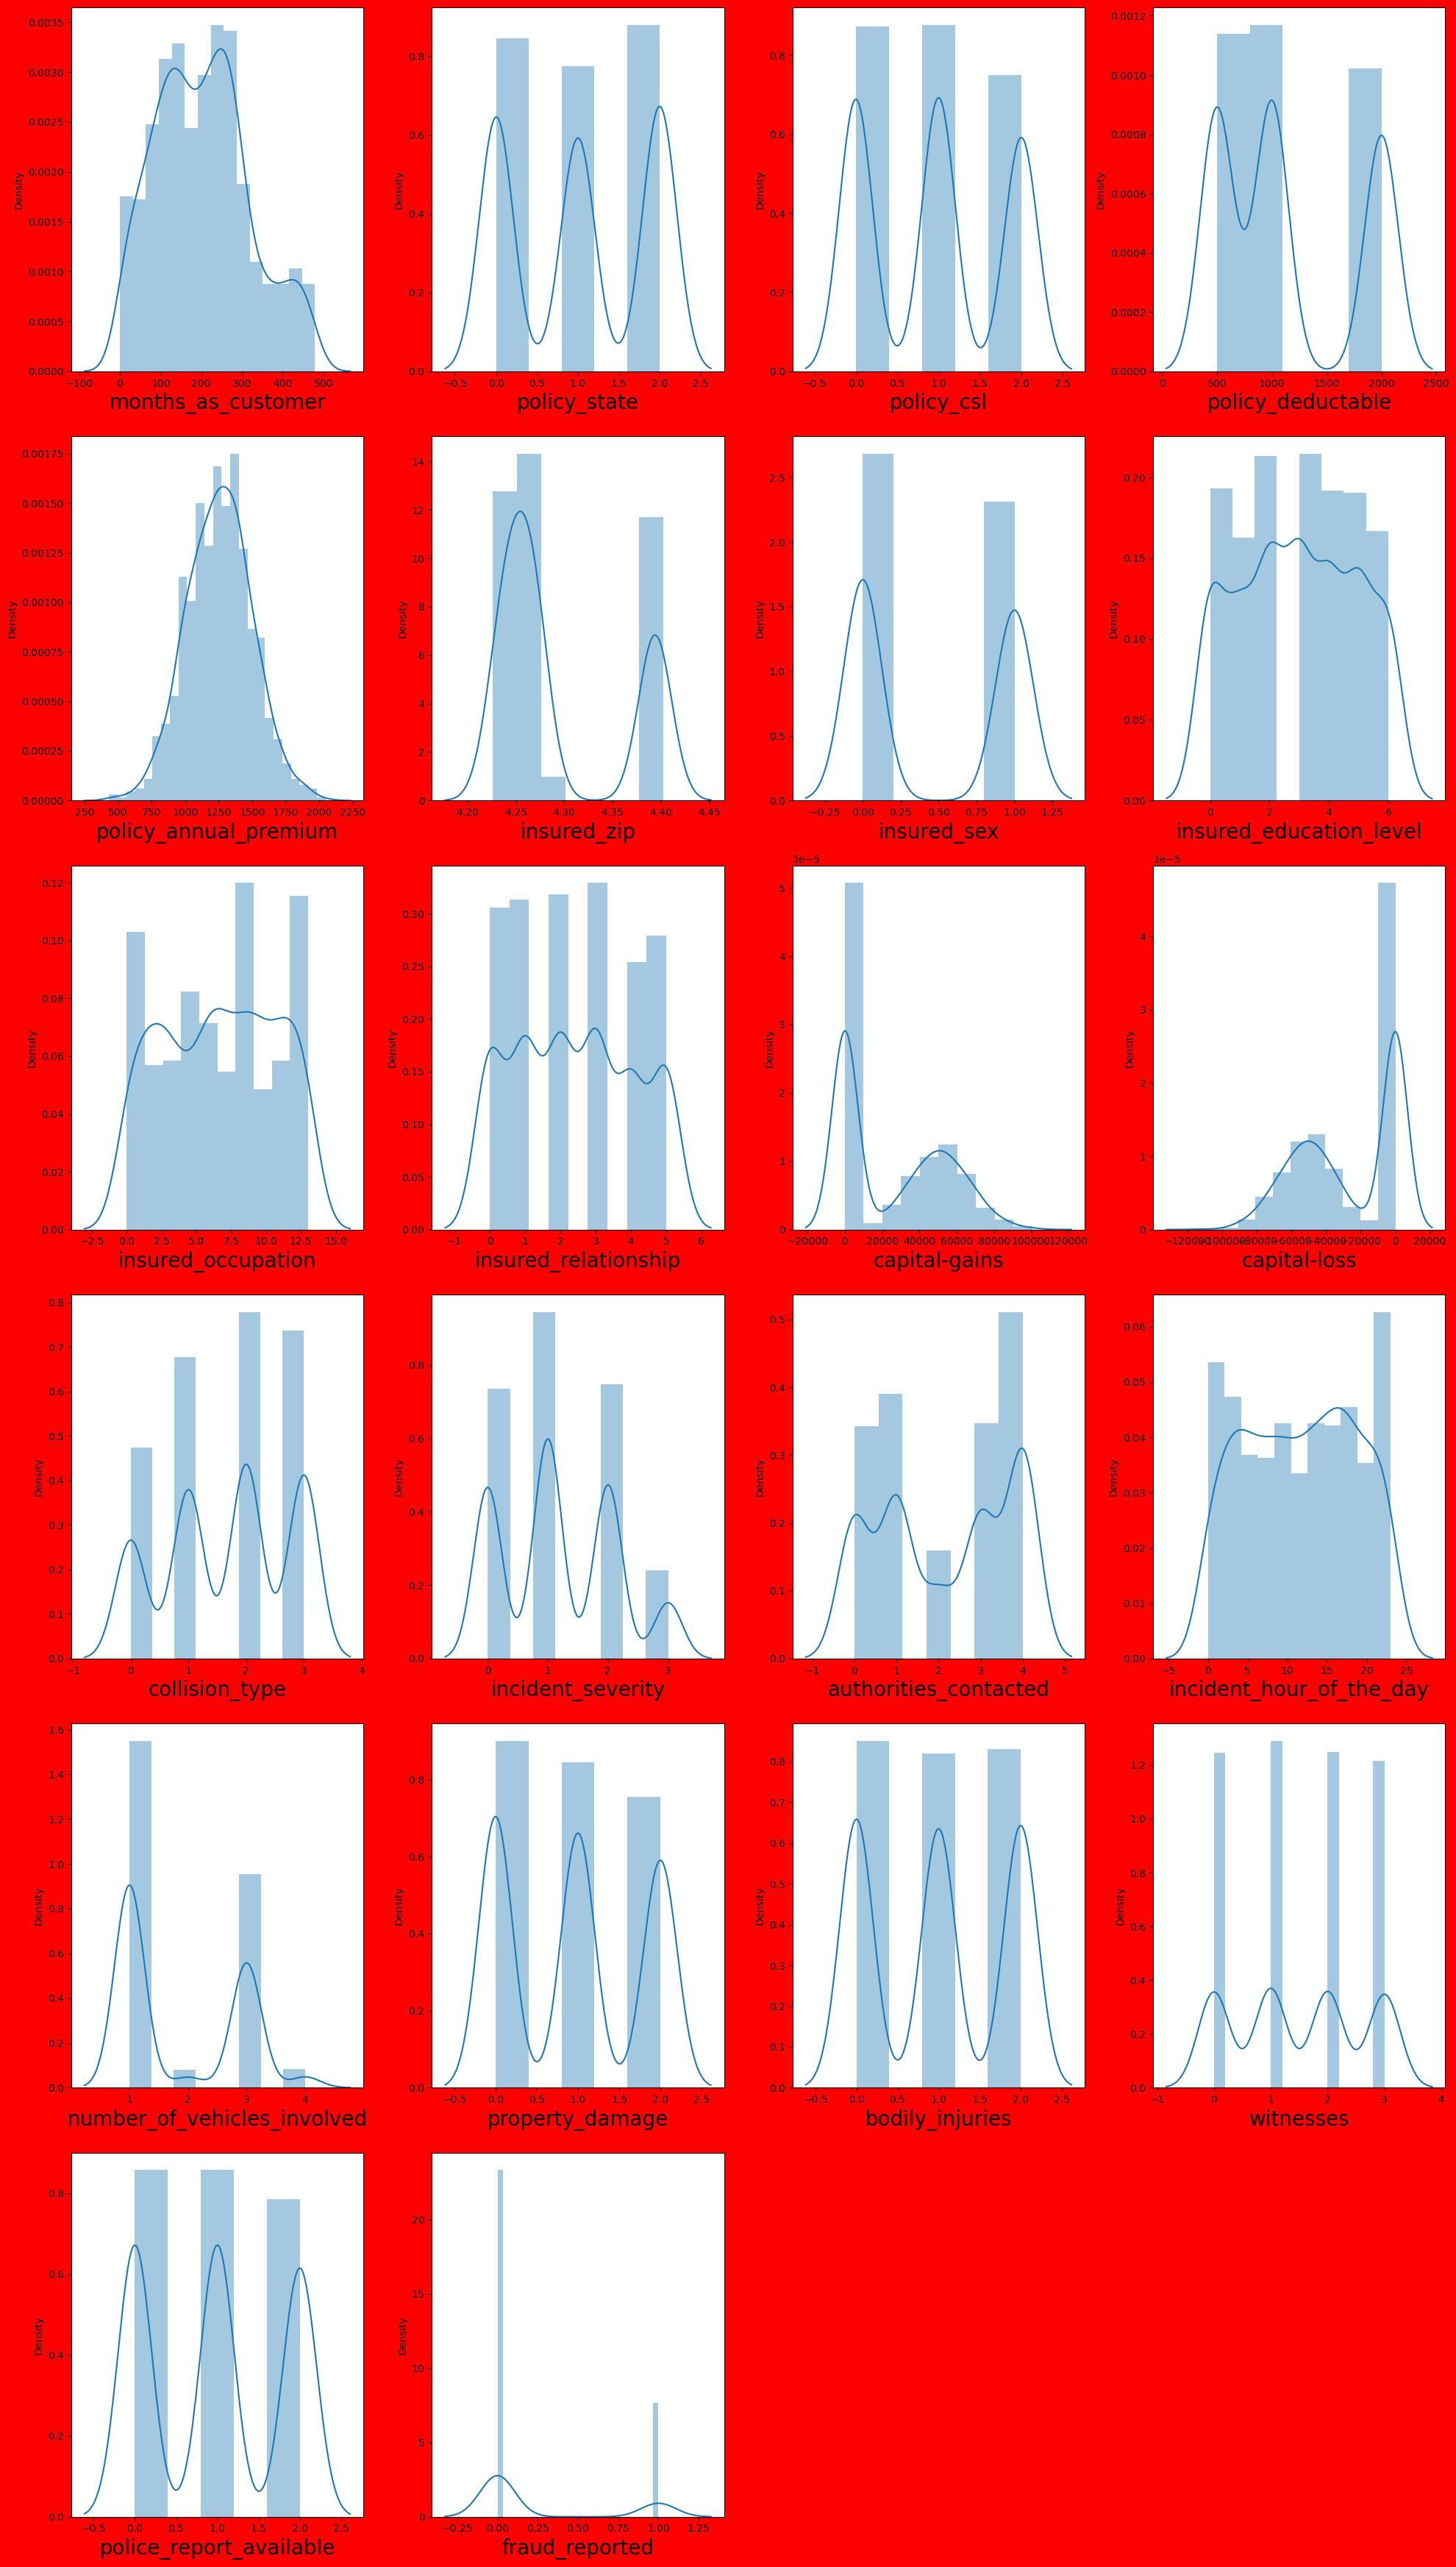

In [90]:
plt.figure(figsize=(20,35), facecolor='red')
plotnumber = 1

for column in dt:                       
    if plotnumber<=22:                    
        ax = plt.subplot(6,4,plotnumber)    
        sns.distplot(dt[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()

# 

# 

## Removing Outliners

In [91]:
dt.describe()

months_as_customer  policy_state   policy_csl  policy_deductable  \
count         1000.000000    1000.00000  1000.000000        1000.000000   
mean           203.954000       1.01400     0.951000        1136.000000   
std            115.113174       0.83096     0.804516         611.864673   
min              0.000000       0.00000     0.000000         500.000000   
25%            115.750000       0.00000     0.000000         500.000000   
50%            199.500000       1.00000     1.000000        1000.000000   
75%            276.250000       2.00000     2.000000        2000.000000   
max            479.000000       2.00000     2.000000        2000.000000   

       policy_annual_premium  insured_zip  insured_sex  \
count            1000.000000  1000.000000  1000.000000   
mean             1256.406150     4.294603     0.463000   
std               244.167395     0.065436     0.498879   
min               433.330000     4.226225     0.000000   
25%              1089.607500     4.245837     0.000000   
50%              1257.200000     4.264487     0.000000   
75%              1415.695000     4.388111     1.000000   
max              2047.590000     4.402242     1.000000   

       insured_education_level  insured_occupation  insured_relationship  \
count              1000.000000         1000.000000           1000.000000   
mean                  2.966000            6.653000              2.416000   
std                   1.948497            4.019048              1.681003   
min                   0.000000            0.000000              0.000000   
25%                   1.000000            3.000000              1.000000   
50%                   3.000000            7.000000              2.000000   
75%                   5.000000           10.000000              4.000000   
max                   6.000000           13.000000              5.000000   

       capital-gains   capital-loss  collision_type  incident_severity  \
count    1000.000000    1000.000000     1000.000000        1000.000000   
mean    25126.100000  -26793.700000        1.666000           1.184000   
std     27872.187708   28104.096686        1.063755           0.939695   
min         0.000000 -111100.000000        0.000000           0.000000   
25%         0.000000  -51500.000000        1.000000           0.000000   
50%         0.000000  -23250.000000        2.000000           1.000000   
75%     51025.000000       0.000000        3.000000           2.000000   
max    100500.000000       0.000000        3.000000           3.000000   

       authorities_contacted  incident_hour_of_the_day  \
count            1000.000000               1000.000000   
mean                2.167000                 11.644000   
std                 1.532142                  6.951373   
min                 0.000000                  0.000000   
25%                 1.000000                  6.000000   
50%                 2.000000                 12.000000   
75%                 4.000000                 17.000000   
max                 4.000000                 23.000000   

       number_of_vehicles_involved  property_damage  bodily_injuries  \
count                   1000.00000       1000.00000      1000.000000   
mean                       1.83900          0.94200         0.992000   
std                        1.01888          0.81197         0.820127   
min                        1.00000          0.00000         0.000000   
25%                        1.00000          0.00000         0.000000   
50%                        1.00000          1.00000         1.000000   
75%                        3.00000          2.00000         2.000000   
max                        4.00000          2.00000         2.000000   

         witnesses  police_report_available  fraud_reported  
count  1000.000000              1000.000000     1000.000000  
mean      1.487000                 0.971000        0.247000  
std       1.111335                 0.810442        0.431483  
min       0.000000                 0

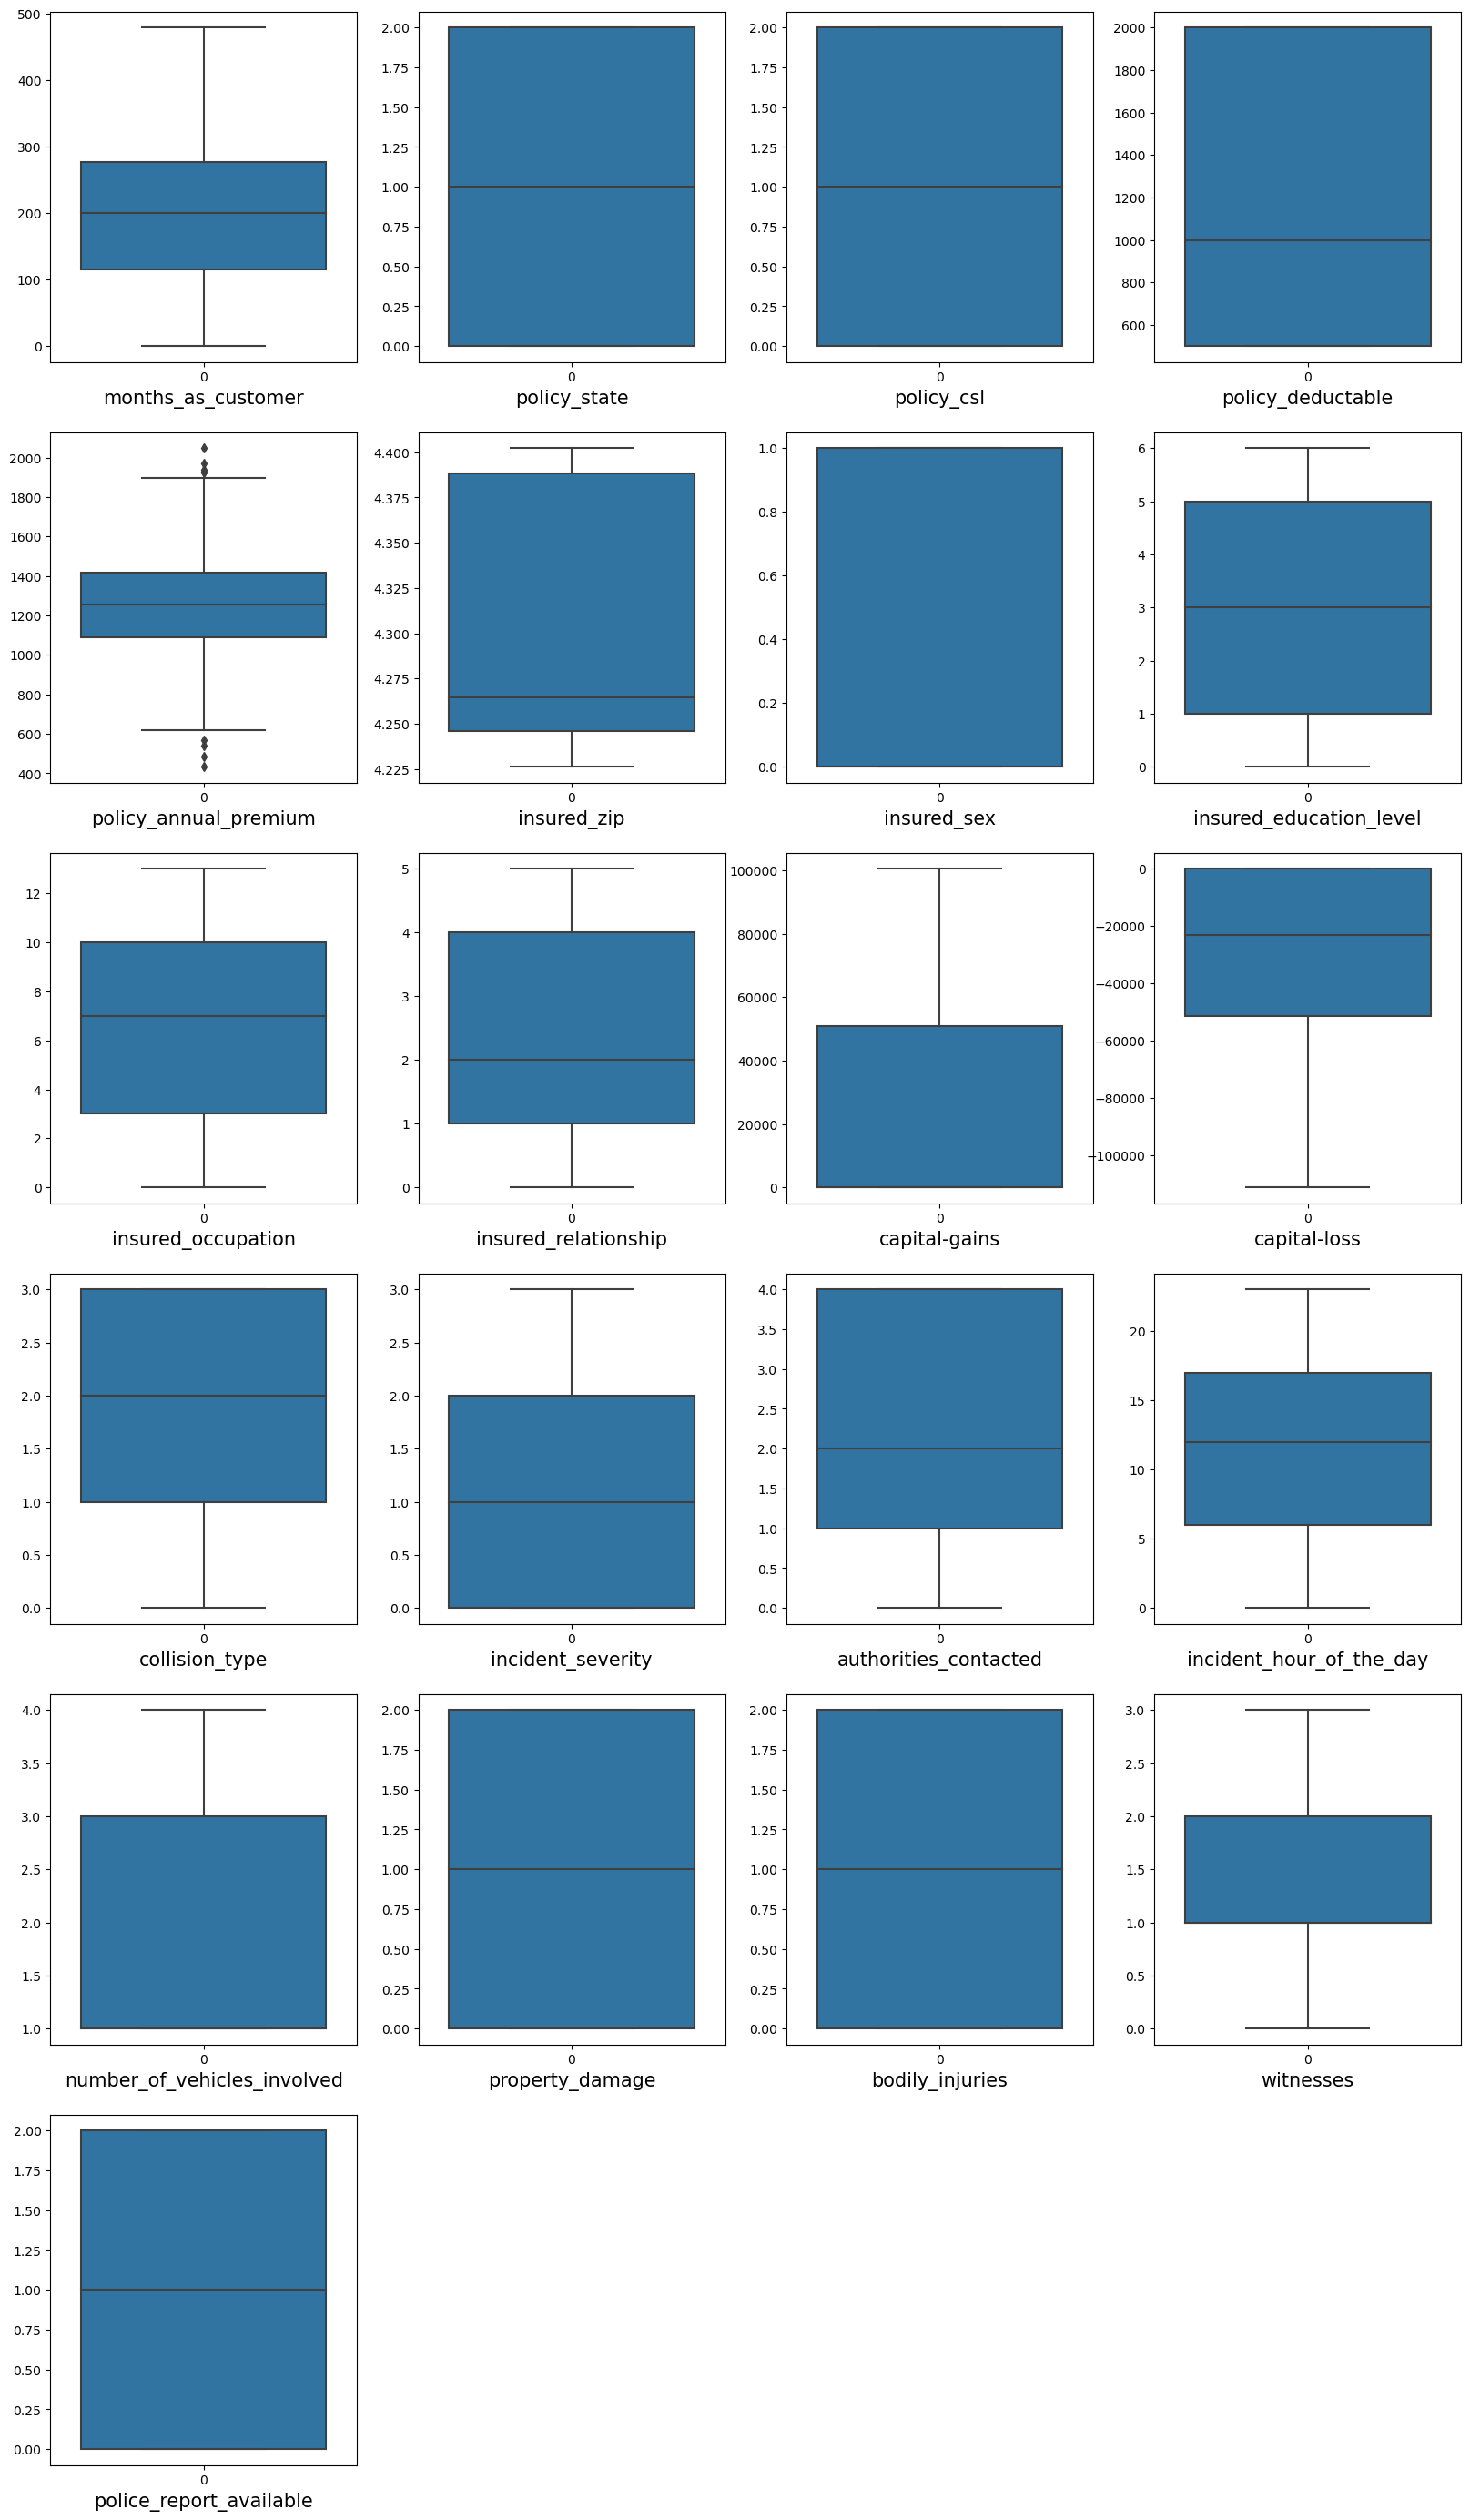

In [92]:
df_features = dt.drop('fraud_reported',axis=1)

plt.figure(figsize=(20,35))
graph = 1

for column in df_features:  
    if graph<=22:
        plt.subplot(6, 4, graph)
        ax=sns.boxplot(data= df_features [column])
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

##### No outliners found

# 

# 

## Feature Elimination

In [93]:
dt.head(2)

months_as_customer  policy_state  policy_csl  policy_deductable  \
0                 328             2           1               1000   
1                 228             1           1               2000   

   policy_annual_premium  insured_zip  insured_sex  insured_education_level  \
0                1406.91     4.264168            1                        4   
1                1197.22     4.266242            1                        4   

   insured_occupation  insured_relationship  capital-gains  capital-loss  \
0                   2                     0          53300             0   
1                   6                     2              0             0   

   collision_type  incident_severity  authorities_contacted  \
0               3                  0                      4   
1               0                  1                      4   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                2   
1                         8                            1                0   

   bodily_injuries  witnesses  police_report_available  fraud_reported  
0                1          2                        2               1  
1                0          0                        0               1

In [94]:
dt.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [95]:
dt.shape

(1000, 22)

### Getting Feature Score

In [96]:
x=dt.drop('fraud_reported',axis=1)
y=dt[['fraud_reported']]

In [97]:
best_features = SelectKBest(score_func=f_classif, k=21)

fit = best_features.fit(x,y)

dt_scores = pd.DataFrame(fit.scores_) 
dt_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([dt_columns, dt_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(21, 'Score'))

                   Feature_Name       Score
13            incident_severity  196.960603
12               collision_type   12.252860
16  number_of_vehicles_involved    2.689100
19                    witnesses    2.451026
14        authorities_contacted    2.098018
2                    policy_csl    1.382236
18              bodily_injuries    1.146656
6                   insured_sex    0.952144
17              property_damage    0.929077
1                  policy_state    0.865237
20      police_report_available    0.791953
5                   insured_zip    0.471542
9          insured_relationship    0.442135
0            months_as_customer    0.421370
10                capital-gains    0.366990
11                 capital-loss    0.220519
3             policy_deductable    0.219163
4         policy_annual_premium    0.209284
7       insured_education_level    0.077435
15     incident_hour_of_the_day    0.018590
8            insured_occupation    0.002440


### Train-Test Split

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state=348)

In [99]:
x_train.head(2)

months_as_customer  policy_state  policy_csl  policy_deductable  \
854                  30             1           2                500   
308                 156             2           2               1000   

     policy_annual_premium  insured_zip  insured_sex  insured_education_level  \
854                1488.26     4.237809            0                        1   
308                1086.48     4.242140            1                        0   

     insured_occupation  insured_relationship  capital-gains  capital-loss  \
854                   6                     5              0        -63500   
308                   6                     4              0        -53800   

     collision_type  incident_severity  authorities_contacted  \
854               3                  2                      4   
308               2                  2                      3   

     incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
854                        17                            3                1   
308                        17                            3                0   

     bodily_injuries  witnesses  police_report_available  
854                2          2                        0  
308                1          1                        2

### Model Training

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 24)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=24)

In [101]:
print('Accuracy Score of Training Data:',rf_model.score(x_train, y_train))

Accuracy Score of Training Data: 1.0


In [102]:
y_pred = rf_model.predict(x_test)

In [103]:
print(f"Score:{rf_model.score(x_test, y_test)}")

Score:0.788


### Recursive Feature Elimination

In [104]:
from sklearn.feature_selection import RFE

In [105]:
rfe = RFE(estimator=RandomForestClassifier(random_state= 24), n_features_to_select=10)
rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=24), n_features_to_select=10)

In [106]:
rfe.support_

array([ True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False])

In [107]:
sum(rfe.support_)

10

In [108]:
x_train_df = pd.DataFrame(x_train, columns=x_train.columns[rfe.support_])
x_test_df = pd.DataFrame(x_test, columns=x_test.columns[rfe.support_])

In [109]:
x_train_df.head(2)

months_as_customer  policy_annual_premium  insured_zip  \
854                  30                1488.26     4.237809   
308                 156                1086.48     4.242140   

     insured_education_level  insured_occupation  capital-gains  capital-loss  \
854                        1                   6              0        -63500   
308                        0                   6              0        -53800   

     collision_type  incident_severity  incident_hour_of_the_day  
854               3                  2                        17  
308               2                  2                        17

In [110]:
x_train_df.columns

Index(['months_as_customer', 'policy_annual_premium', 'insured_zip',
       'insured_education_level', 'insured_occupation', 'capital-gains',
       'capital-loss', 'collision_type', 'incident_severity',
       'incident_hour_of_the_day'],
      dtype='object')

In [111]:
x_train_df.shape, x_test_df.shape

((750, 10), (250, 10))

# 

# 

## Standardization

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 

## Importing important Metrices

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

# 

## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [116]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [117]:
cls_reg.coef_

array([[ 3.79808359e-02, -6.38862267e-04, -1.90631105e-02,
         7.44335467e-03, -6.96846355e-02, -4.19265531e-03,
        -9.49094957e-03,  1.35673113e-02, -4.36932019e-03,
         5.81600649e-02, -1.97671236e-02, -7.97992381e-02,
         5.06381451e-02, -1.35240925e+00,  7.13343876e-02,
        -1.14855294e-01, -5.90330265e-02,  3.41719124e-02,
         1.68894335e-01,  1.17913858e-01, -5.27538738e-02]])

In [118]:
cls_reg.intercept_

array([-1.42490962])

### Accuracy Score of Training Data

In [119]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.808


### Predicting Test Data

In [120]:
y_pred = cls_reg.predict(x_test)

### Accuracy Score of Testing Data

In [121]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.768


### Confusion Matrix

In [122]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[174,  27],
       [ 31,  18]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

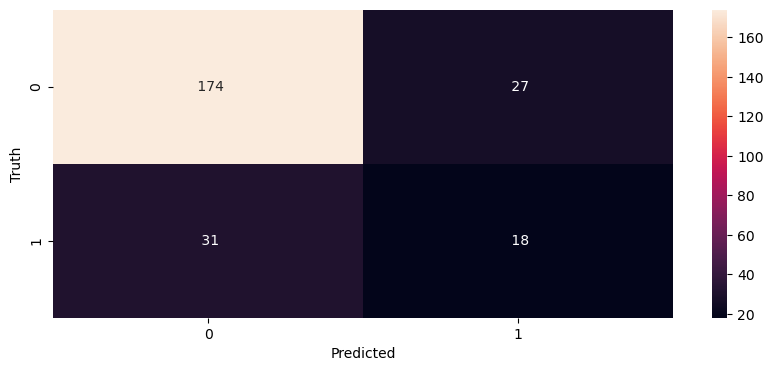

In [123]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

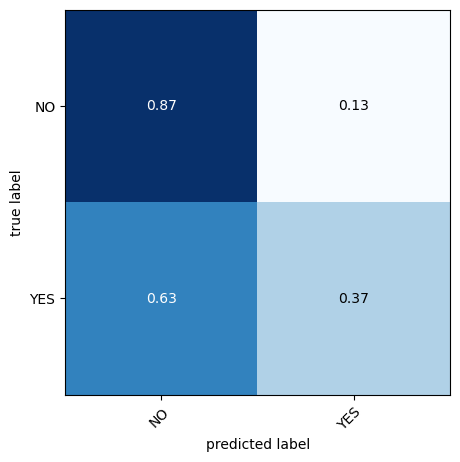

In [124]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       201
           1       0.40      0.37      0.38        49

    accuracy                           0.77       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.76      0.77      0.76       250



In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [127]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.36734694 1.        ]
False Positive rate =  [0.         0.13432836 1.        ]


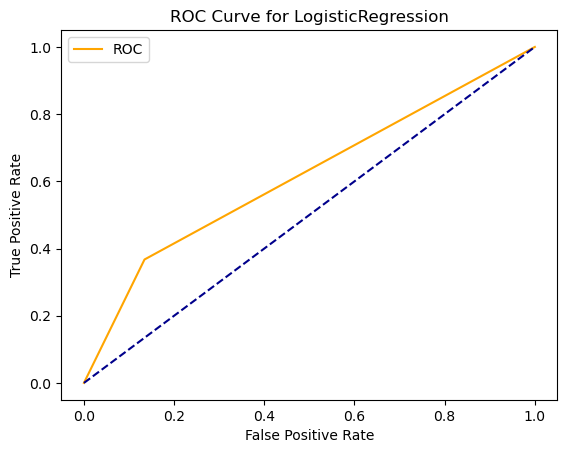

In [128]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend()
plt.show()

### roc_auc_score

In [129]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.6165092902832775

### Cross-validation

In [130]:
from sklearn.model_selection import KFold, cross_val_score

In [131]:
c1 = cross_val_score(cls_reg, x_train, y_train, cv=5)
c1

array([0.80666667, 0.80666667, 0.74666667, 0.84      , 0.75333333])

In [132]:
c1.mean()

0.7906666666666666

In [133]:
c2 = cross_val_score(cls_reg, x_test, y_test, cv=5)
c2

array([0.84, 0.78, 0.78, 0.72, 0.76])

In [134]:
c2.mean()

0.776

### ROC Curve

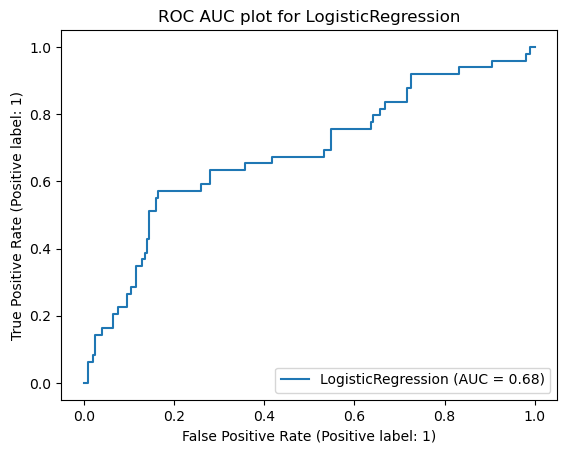

In [135]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_reg, x_test,y_test)
plt.title("ROC AUC plot for LogisticRegression")
plt.show()

# 

# 

## BaggingClassifier with DecisionTreeClassifier

In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [137]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10))

In [138]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        min_samples_split=10))

### Accuracy Score of Training Data

In [139]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.9133333333333333


### Predicting Test Data

In [140]:
y_pred = bag1.predict(x_test)

### Accuracy Score of Testing Data

In [141]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.776


### Confusion Matrix

In [142]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[173,  28],
       [ 28,  21]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

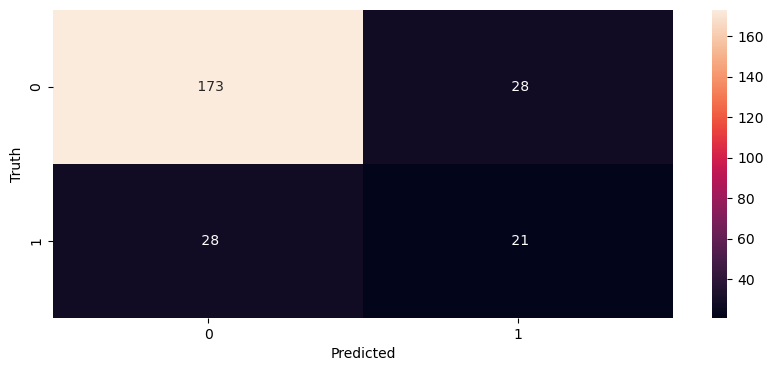

In [143]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

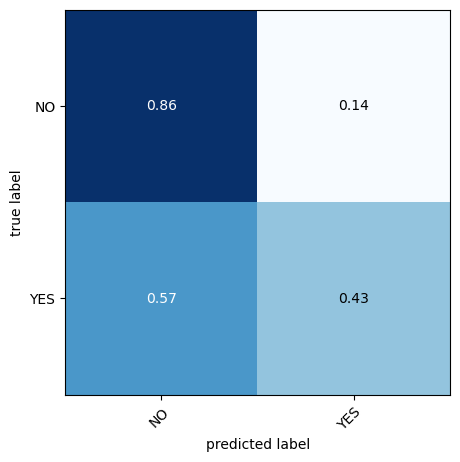

In [144]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       201
           1       0.43      0.43      0.43        49

    accuracy                           0.78       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.78      0.78      0.78       250



In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [147]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.42857143 1.        ]
False Positive rate =  [0.         0.13930348 1.        ]


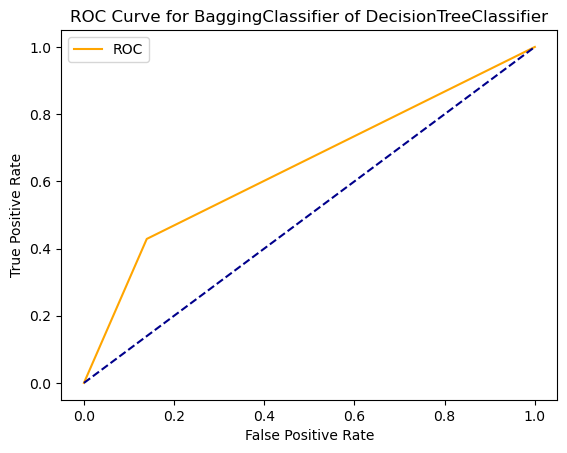

In [148]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of DecisionTreeClassifier')
plt.legend()
plt.show()

### roc_auc_score

In [149]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.644633972992182

### Cross-validation

In [150]:
from sklearn.model_selection import KFold, cross_val_score

In [151]:
c3=cross_val_score (bag1, x_train, y_train, cv=5)
c3

array([0.80666667, 0.82      , 0.73333333, 0.83333333, 0.78666667])

In [152]:
c3.mean()

0.796

In [153]:
c4 = cross_val_score (bag1, x_test, y_test, cv=5)
c4

array([0.82, 0.82, 0.84, 0.68, 0.74])

In [154]:
c4.mean()

0.78

### ROC Curve

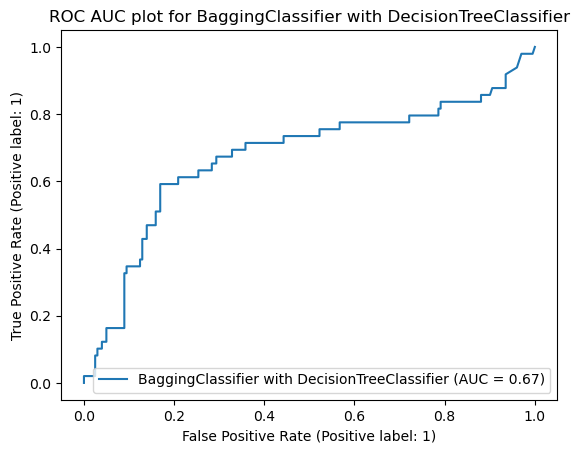

In [155]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(bag1, x_test,y_test, name='BaggingClassifier with DecisionTreeClassifier')
plt.title("ROC AUC plot for BaggingClassifier with DecisionTreeClassifier")
plt.show()

# 

# 

## Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 6,
 'n_estimators': 150}

In [158]:
cls_rf = RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16)

In [159]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=240)

### Accuracy Score of Training Data

In [160]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 1.0


### Predicting Test Data

In [161]:
y_pred = cls_rf.predict(x_test)

### Accuracy Score of Testing Data

In [162]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.784


### Confusion Matrix

In [163]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[174,  27],
       [ 27,  22]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

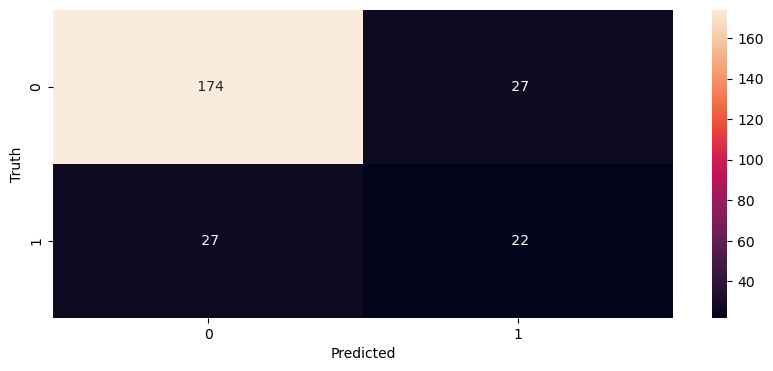

In [164]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

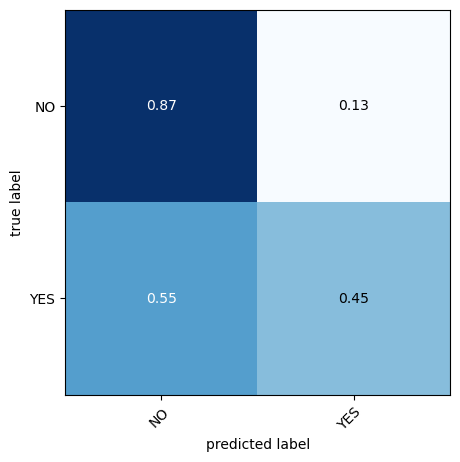

In [165]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       201
           1       0.45      0.45      0.45        49

    accuracy                           0.78       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.78      0.78      0.78       250



In [167]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [168]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.44897959 1.        ]
False Positive rate =  [0.         0.13432836 1.        ]


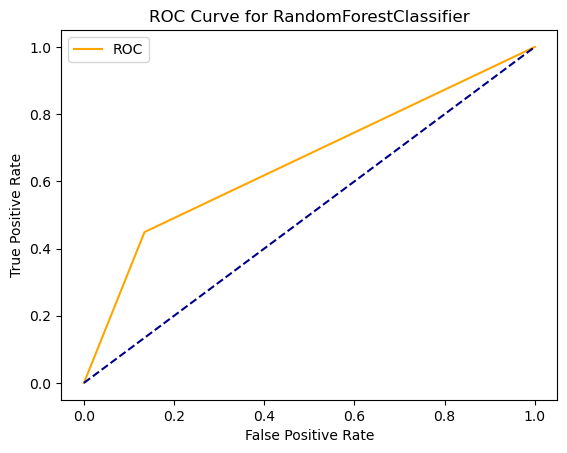

In [169]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

### roc_auc_score

In [170]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.6573256168138898

### Cross-validation

In [171]:
from sklearn.model_selection import KFold, cross_val_score

In [172]:
c5 = cross_val_score (cls_rf, x_train, y_train, cv=5)
c5

array([0.82      , 0.81333333, 0.82      , 0.82666667, 0.8       ])

In [173]:
c5.mean()

0.8160000000000001

In [174]:
c6 = cross_val_score (cls_rf, x_test, y_test, cv=5)
c6

array([0.82, 0.78, 0.8 , 0.74, 0.82])

In [175]:
c6.mean()

0.792

### ROC Curve

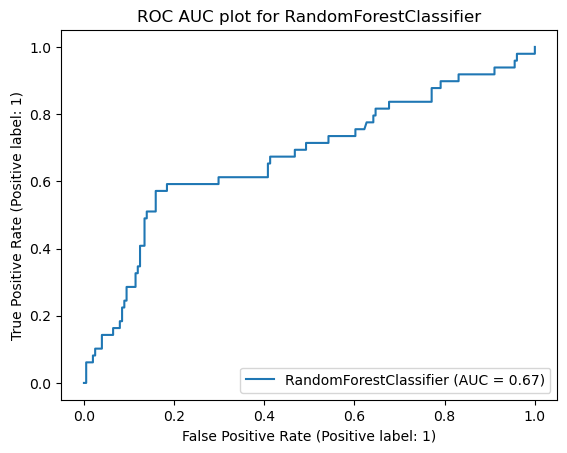

In [176]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_rf, x_test,y_test)
plt.title("ROC AUC plot for RandomForestClassifier")
plt.show()

# 

# 

## BaggingClassifier with RandomForestClassifier

In [177]:
from sklearn.ensemble import BaggingClassifier

In [178]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16))

In [179]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=240))

### Accuracy Score of Training Data

In [180]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.9466666666666667


### Predicting Test Data

In [181]:
y_pred = bag2.predict(x_test)

### Accuracy Score of Testing Data

In [182]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.792


### Confusion Matrix

In [183]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[177,  24],
       [ 28,  21]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

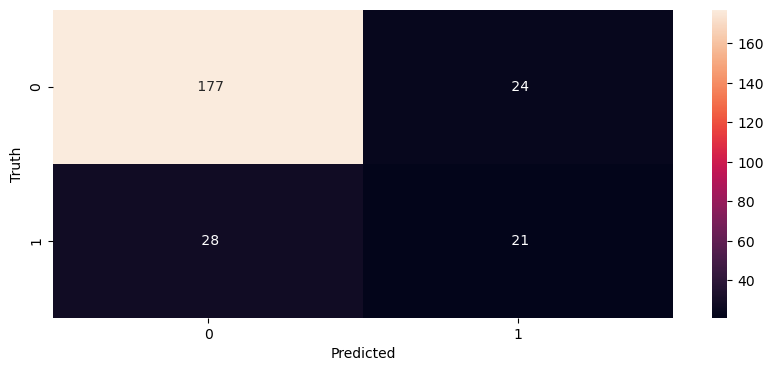

In [184]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

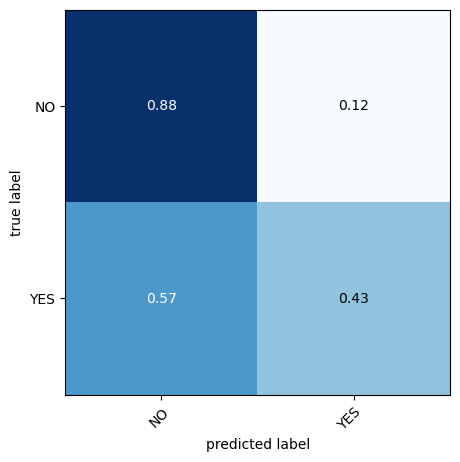

In [185]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       201
           1       0.47      0.43      0.45        49

    accuracy                           0.79       250
   macro avg       0.67      0.65      0.66       250
weighted avg       0.79      0.79      0.79       250



In [187]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [188]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.42857143 1.        ]
False Positive rate =  [0.         0.11940299 1.        ]


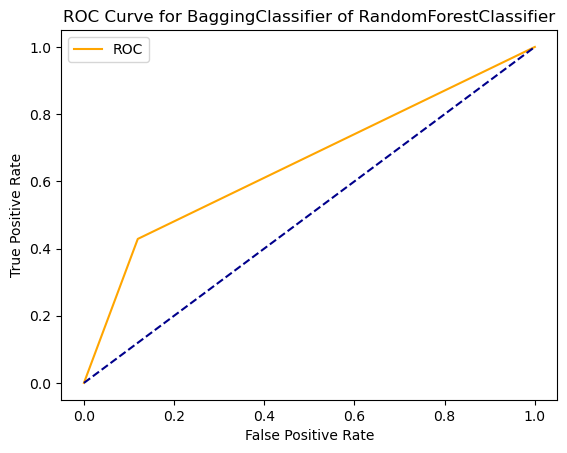

In [189]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of RandomForestClassifier')
plt.legend()
plt.show()

### roc_auc_score

In [190]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.6545842217484008

### Cross-validation

In [191]:
from sklearn.model_selection import KFold, cross_val_score

In [192]:
c7 = cross_val_score (bag2, x_train, y_train, cv=5)
c7

array([0.82      , 0.81333333, 0.81333333, 0.80666667, 0.78      ])

In [193]:
c7.mean()

0.8066666666666666

In [194]:
c8 = cross_val_score (bag2, x_test, y_test, cv=5)
c8

array([0.82, 0.8 , 0.8 , 0.78, 0.82])

In [195]:
c8.mean()

0.804

### ROC Curve

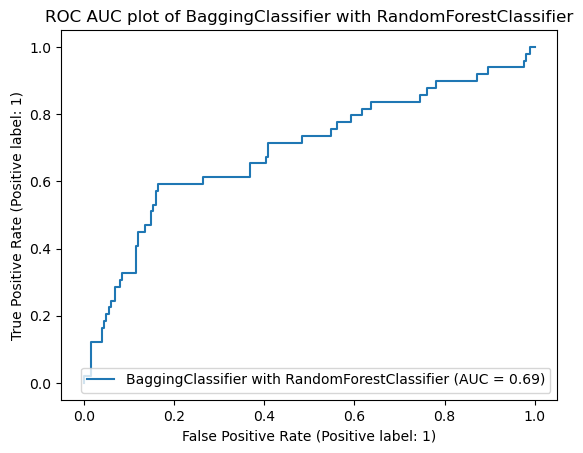

In [196]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(bag2, x_test,y_test, name='BaggingClassifier with RandomForestClassifier')
plt.title("ROC AUC plot of BaggingClassifier with RandomForestClassifier")
plt.show()

# 

# 

## GradientBoostingClassifier

In [197]:
from sklearn.ensemble import GradientBoostingClassifier

In [198]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3)

In [199]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=17)

### Accuracy Score of Training Data

In [200]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9586666666666667


### Predicting Test Data

In [201]:
y_pred = cls_gb.predict(x_test)

### Accuracy Score of Testing Data

In [202]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.76


### Confusion Matrix

In [203]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[166,  35],
       [ 25,  24]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

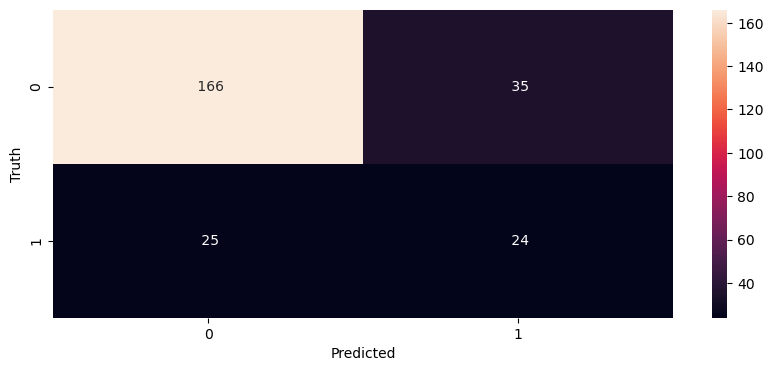

In [204]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

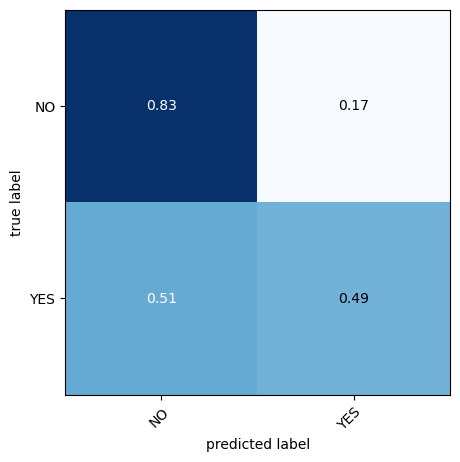

In [205]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       201
           1       0.41      0.49      0.44        49

    accuracy                           0.76       250
   macro avg       0.64      0.66      0.65       250
weighted avg       0.78      0.76      0.77       250



In [207]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [208]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.48979592 1.        ]
False Positive rate =  [0.         0.17412935 1.        ]


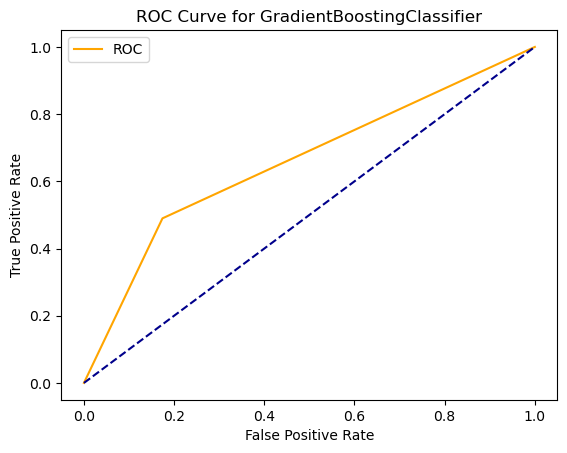

In [209]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

### roc_auc_score

In [210]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.6578332825667581

### Cross-validation

In [211]:
from sklearn.model_selection import KFold, cross_val_score

In [212]:
c9 = cross_val_score (cls_gb, x_train, y_train, cv=5)
c9

array([0.74      , 0.75333333, 0.76666667, 0.78666667, 0.76      ])

In [213]:
c9.mean()

0.7613333333333333

In [214]:
c10 = cross_val_score (cls_gb, x_test, y_test, cv=5)
c10

array([0.82, 0.72, 0.8 , 0.6 , 0.78])

In [215]:
c10.mean()

0.744

### ROC Curve

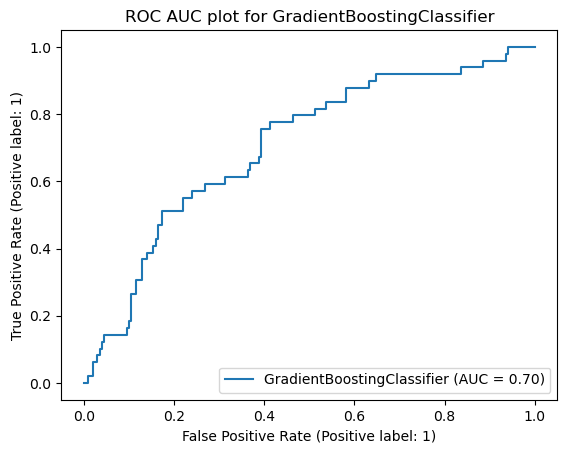

In [216]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cls_gb, x_test,y_test)
plt.title("ROC AUC plot for GradientBoostingClassifier")
plt.show()

# 

# 

## BaggingClassifier with GradientBoostingClassifier

In [217]:
from sklearn.ensemble import BaggingClassifier

In [218]:
bag4 = BaggingClassifier(GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3))

In [219]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=17))

### Accuracy Score of Training Data

In [220]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9586666666666667


### Predicting Test Data

In [221]:
y_pred = cls_gb.predict(x_test)

### Accuracy Score of Testing Data

In [222]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.76


### Confusion Matrix

In [223]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[166,  35],
       [ 25,  24]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

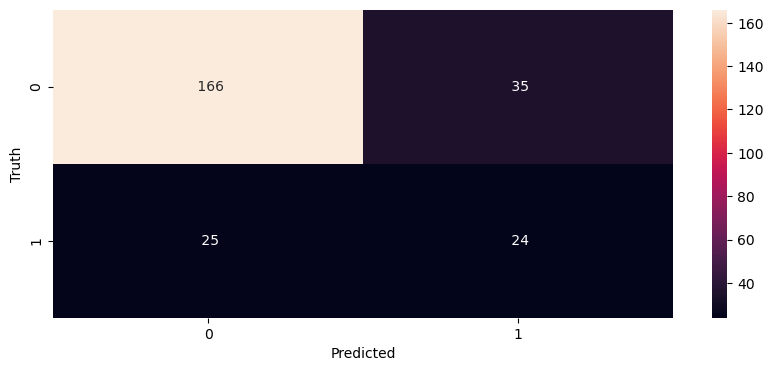

In [224]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

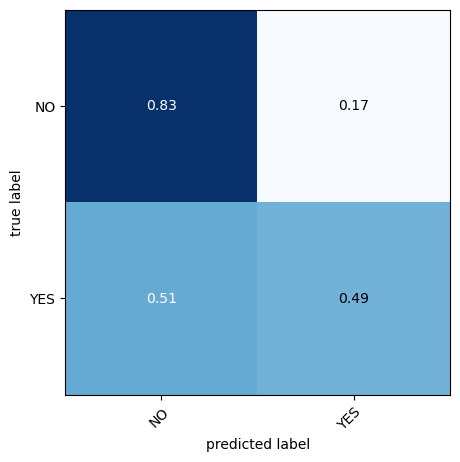

In [225]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [226]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[166,  35],
       [ 25,  24]], dtype=int64)

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       201
           1       0.41      0.49      0.44        49

    accuracy                           0.76       250
   macro avg       0.64      0.66      0.65       250
weighted avg       0.78      0.76      0.77       250



In [228]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [229]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.48979592 1.        ]
False Positive rate =  [0.         0.17412935 1.        ]


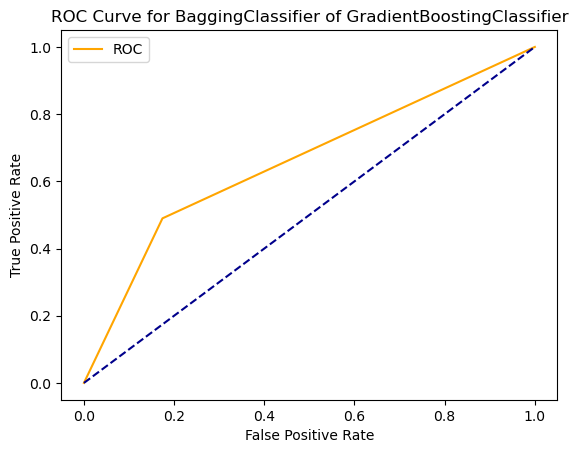

In [230]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier of GradientBoostingClassifier')
plt.legend()
plt.show()

### roc_auc_score

In [231]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.6578332825667581

### Cross-validation

In [232]:
from sklearn.model_selection import KFold, cross_val_score

In [233]:
c11 = cross_val_score (bag4, x_train, y_train, cv=5)
c11

array([0.81333333, 0.83333333, 0.78666667, 0.81333333, 0.78      ])

In [234]:
c11.mean()

0.8053333333333335

In [235]:
c12 = cross_val_score (bag4, x_test, y_test, cv=5)
c12

array([0.82, 0.76, 0.78, 0.64, 0.8 ])

In [236]:
c12.mean()

0.7600000000000001

### ROC Curve

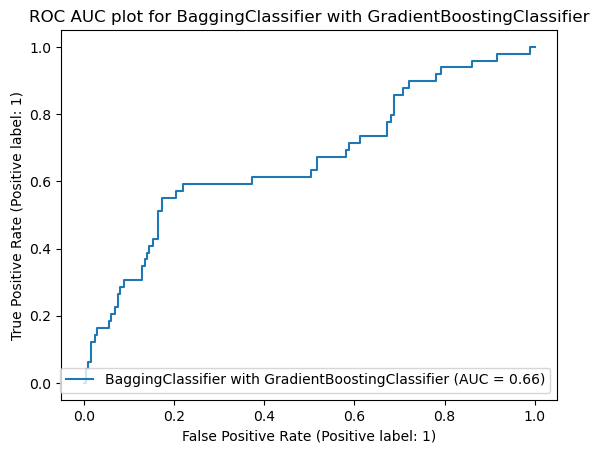

In [237]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(bag4, x_test,y_test, name='BaggingClassifier with GradientBoostingClassifier')
plt.title("ROC AUC plot for BaggingClassifier with GradientBoostingClassifier")
plt.show()

# 

# 

## GaussianNB

In [238]:
from sklearn.naive_bayes import GaussianNB

In [239]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [240]:
gnb = GaussianNB(var_smoothing=1e-09)

In [241]:
gnb.fit(x_train, y_train)

GaussianNB()

### Accuracy Score of Training Data

In [242]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.808


### Predicting Test Data

In [243]:
y_pred = gnb.predict(x_test)

### Accuracy Score of Testing Data

In [244]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.776


### Confusion Matrix

In [245]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[173,  28],
       [ 28,  21]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

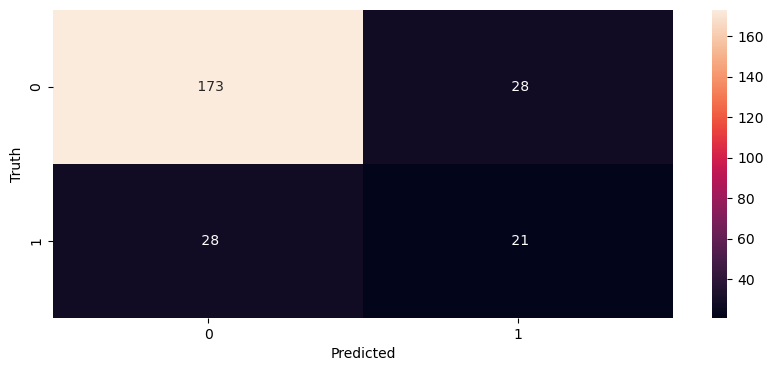

In [246]:
import seaborn as sn
plt.figure(figsize = (10,4))
sn.heatmap(cm, annot=True,fmt=" .0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

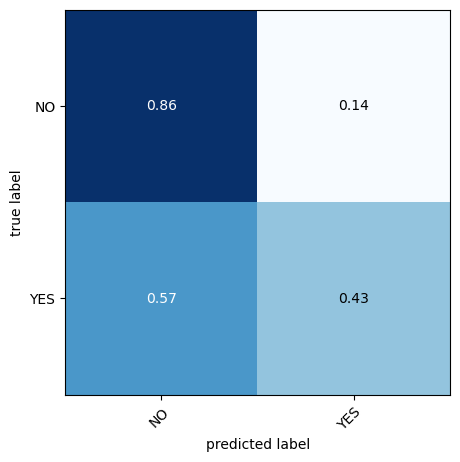

In [247]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [248]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       201
           1       0.43      0.43      0.43        49

    accuracy                           0.78       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.78      0.78      0.78       250



In [249]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [250]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.42857143 1.        ]
False Positive rate =  [0.         0.13930348 1.        ]


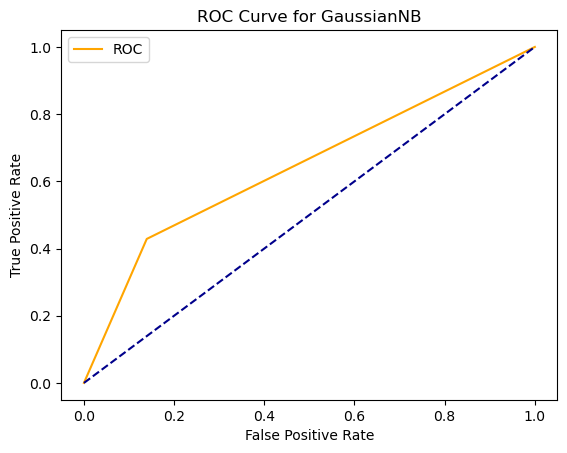

In [251]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

### roc_auc_score

In [252]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.644633972992182

### Cross-validation

In [253]:
from sklearn.model_selection import KFold, cross_val_score

In [254]:
c13 = cross_val_score (gnb, x_train, y_train, cv=5)
c13

array([0.78666667, 0.81333333, 0.78      , 0.81333333, 0.75333333])

In [255]:
c13.mean()

0.7893333333333333

In [256]:
c14 = cross_val_score (gnb, x_test, y_test, cv=5)
c14

array([0.8 , 0.72, 0.82, 0.7 , 0.76])

In [257]:
c14.mean()

0.76

### ROC Curve

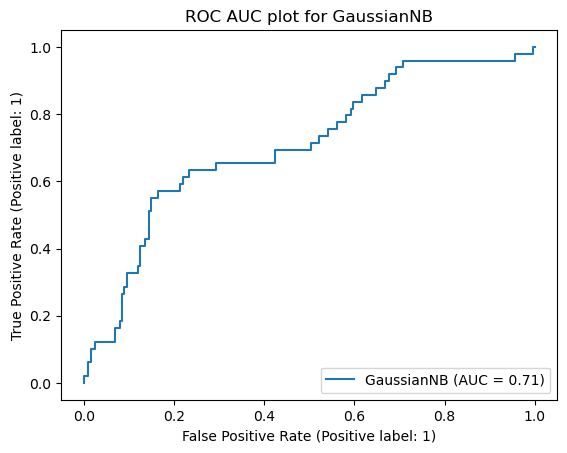

In [258]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb, x_test,y_test)
plt.title("ROC AUC plot for GaussianNB")
plt.show()

# 

# 

### Plotting ROC Curve for all models

In [259]:
from sklearn.metrics import plot_roc_curve

#### Training Data

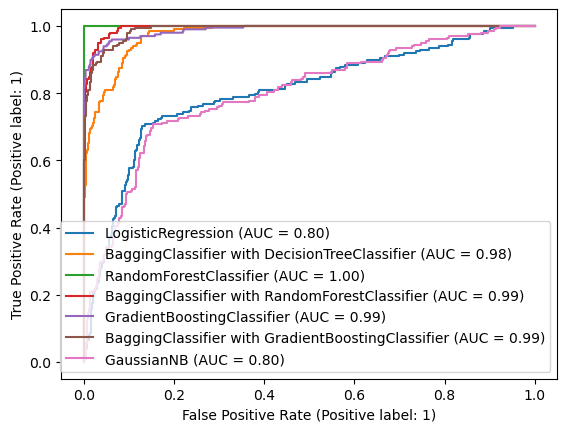

In [260]:
disp = plot_roc_curve(cls_reg, x_train, y_train)

plot_roc_curve (bag1, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with DecisionTreeClassifier')
plot_roc_curve (cls_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag2, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with RandomForestClassifier')

plot_roc_curve (cls_gb, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag4, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with GradientBoostingClassifier')
plot_roc_curve (gnb, x_train, y_train, ax=disp.ax_)


plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

#### Testing Data

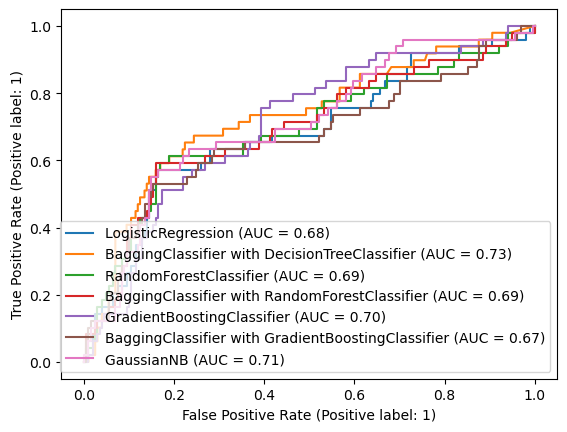

In [261]:
disp = plot_roc_curve (cls_reg, x_test, y_test)

plot_roc_curve (bag1, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with DecisionTreeClassifier')
plot_roc_curve (cls_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag2, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with RandomForestClassifier')

plot_roc_curve (cls_gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag4, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with GradientBoostingClassifier')
plot_roc_curve (gnb, x_test, y_test, ax=disp.ax_)


plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

# 

# 

## Saving the Top 3 Best Models

In [262]:
import pickle 

In [263]:
with open('bag_rf', 'wb') as f: 
    pickle.dump(bag2, f)

In [264]:
with open('cls_rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

In [265]:
with open('gnb', 'wb') as f: 
    pickle.dump(gnb, f)

# 

## Opening the Saved Models

In [266]:
with open('bag_rf', 'rb') as f:
    l1 = pickle.load(f)

In [267]:
with open('cls_rf', 'rb') as f:
    l2 = pickle.load(f)

In [268]:
with open('gnb', 'rb') as f:
    l3 = pickle.load(f)

# 

## Predicting using Saved models

In [269]:
l1.predict(scaler.transform([[328, 2, 1, 1000, 1406.91, 4.264168, 1, 4, 2, 0, 53300, 0, 3, 0, 4, 5, 1, 2, 1, 2, 2]]))

array([1], dtype=int64)

In [270]:
l2.predict(scaler.transform([[328, 2, 1, 1000, 1406.91, 4.264168, 1, 4, 2, 0, 53300, 0, 3, 0, 4, 5, 1, 2, 1, 2, 2]]))

array([1], dtype=int64)

In [271]:
l3.predict(scaler.transform([[328, 2, 1, 1000, 1406.91, 4.264168, 1, 4, 2, 0, 53300, 0, 3, 0, 4, 5, 1, 2, 1, 2, 2]]))

array([1], dtype=int64)

# 

# 